# ***WiDS DATATHON-2023***

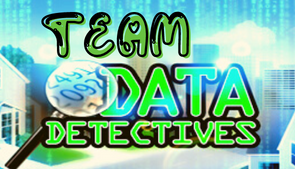

**Theme:** ***Adapting to Climate Change by Improving Extreme Weather Forecasts***

**- Challenge:**  ***Subseasonal climate forecasting***
*Sub-seasonal forecasts for weather and climate conditions (lead-times ranging from 15 to 45 days and beyond) would allow for communities around the world to adapt to the challenges brought on by climate change (such as the onset of drought or occurrence of wet weather extremes)*.

**Our Goal:**
*Our task is to predict the arithmetic mean of the maximum and minimum temperature over the next 14 days, for each location and start date. We will submit forecasts of temperature and precipitation for one year, competing against the other teams as well as official forecasts from NOAA.*


Downloading Data using Kaggle API

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"waleedhassan304","key":"a40a11649119631c27b504385e8f3a61"}'}

In [ ]:
#creating  a kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#copy the kaggle.json file  to the folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all data sets in kaggle
! kaggle datasets list

ref                                                                title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                  8KB  2023-02-01 12:22:51           6248        187  1.0              
amaanansari09/top-100-songs                                        Top 100 songs                                     6KB  2023-02-16 18:55:35            891         32  1.0              
datascientistanna/customers-dataset                                Shop Customer Data                               23KB  2023-02-07 18:42:21           4821        120  1.0              
thedevastator/airbnb-prices-in-european-cities                   

In [ ]:
# downloading data set using API
!kaggle competitions download -c widsdatathon2023

widsdatathon2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip widsdatathon2023.zip

Archive:  widsdatathon2023.zip
replace sample_solution.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Importing all necessary libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization
plt.rcParams.update({'font.size': 14})
from datetime import datetime, timedelta
import seaborn as sns # Data Visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

!pip install jupyterthemes
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)



# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the Data set

In [ ]:
# Define a function to load datasets

def load_data(path):
  data = pd.read_csv(path)
  return data

# Define a function to determine the response variable

def response(train_data, test_data):
  target_var = ""
  for var in train_data.columns:
    if var not in test_data.columns:
      target_var += var
  return target_var

# Loading the datasets as DataFrames into the working environment

train_data = load_data("/content/train_data.csv")
test_data = load_data("/content/test_data.csv")

# Store the response variable

target_var = response(train_data, test_data)

In [ ]:
print(target_var)

contest-tmp2m-14d__tmp2m


In [ ]:
display(train_data.head().style.set_caption("Training Dataset"))
display(test_data.head().style.set_caption("Test Dataset"))

In [ ]:
# Extract all the columns which contain the keyword 34w or 56w
cols_34_56 = []

for c in train_data.columns:
    if ('34w' in c) or ('56w' in c):
        cols_34_56.append(c)
df_cols34_56 = train_data[cols_34_56]
df_cols34_56

# Take the example of the model cfsv20
#df_cols34_56['nmme0-tmp2m-34w__cfsv20'].value_counts()

nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                          29.02                     31.64   
1                          29.02                     31.64   
2                          29.02                     31.64   
3                          29.02                     31.64   
4                          29.02                     31.64   
...                          ...                       ...   
375729                     23.13                     27.20   
375730                     23.13                     27.20   
375731                     23.13                     27.20   
375732                     23.13                     27.20   
375733                     23.13                     27.20   

        nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  \
0                         29.57                    30.73   
1                         29.57                    30.73   
2                         29.57                    30.73   
3                         29.57                    30.73   
4                         29.57                    30.73   
...                         ...                      ...   
375729                    20.25                    24.43   
375730                    20.25                    24.43   
375731                    20.25                    24.43   
375732                    20.25                    24.43   
375733                    20.25                    24.43   

        nmme0-tmp2m-34w__cfsv20  nmme0-tmp2m-34w__gfdlflora0  \
0                         29.71                        31.52   
1                         29.71                        31.52   
2                         29.71                        31.52   
3                         29.71                        31.52   
4                         29.71                        31.52   
...                         ...                          ...   
375729                    18.35                        23.35   
375730                    18.35                        23.35   
375731                    18.35                        23.35   
375732                    18.35                        23.35   
375733                    18.35                        23.35   

        nmme0-tmp2m-34w__gfdlflorb0  nmme0-tmp2m-34w__gfdl0  \
0                             31.68                   30.56   
1                             31.68                   30.56   
2                             31.68                   30.56   
3                             31.68                   30.56   
4                             31.68                   30.56   
...                             ...                     ...   
375729                        23.59                   19.43   
375730                        23.59                   19.43   
375731                        23.59                   19.43   
375732                        23.59                   19.43   
375733                        23.59                   19.43   

        nmme0-tmp2m-34w__nasa0  nmme0-tmp2m-34w__nmme0mean  ...  \
0                        29.66                       30.46  ...   
1                        29.66                       30.46  ...   
2                        29.66                       30.46  ...   
3                        29.66                       30.46  ...   
4                        29.66                       30.46  ...   
...                        ...                         ...  ...   
375729                   23.23                       22.55  ...   
375730                   23.23                       22.55  ...   
375731                   23.23                       22.55  ...   
375732                   23.23                       22.55  ...   
375733                   23.23                       22.55  ...   

        nmme-tmp2m-34w__cancm3  nmme-tmp2m-34w__cancm4  nmme-tmp2m-34w__ccsm3  \
0                        27.83                   29.34                  27.57   
1                        27.83                   

In [ ]:
# import pandas as pd

# def load_train_data(train_data):
#     return pd.read_csv("/content/train_data.csv")

# def load_test_data(test_data):
#     return pd.read_csv("/content/test_data.csv")

# def find_target_variable(train_data, test_data):
#     target_var = ""
#     for training_col in train_data.columns:
#         if training_col not in test_data.columns:
#             target_var += training_col
#     return target_var

# target_col = (pd.DataFrame()
#               .pipe(load_train_data)
#               .pipe(load_test_data)
#               .pipe(find_target_variable, pd.read_csv("/content/train_data.csv"))
#              )

# print(target_col)

In [ ]:
# Define the variable to predict.

# target_var = ""

# for training_col in train_data.columns:
#     if training_col not in test_data.columns:
#         target_var += training_col

# print(target_var)

In [ ]:
# cols_34_56 = []
# for c in train_data.columns:
#     if ('34w' in c) or ('56w' in c) :
#         cols_34_56.append(c)

# df_cols34_56 = train_data[cols_34_56]
# df_portion = df_cols34_56[:]

# # Take the example of the model cfsv20
# df_portion['nmme0-tmp2m-34w__cfsv20'].value_counts()

# **Visualizing Target Variable**

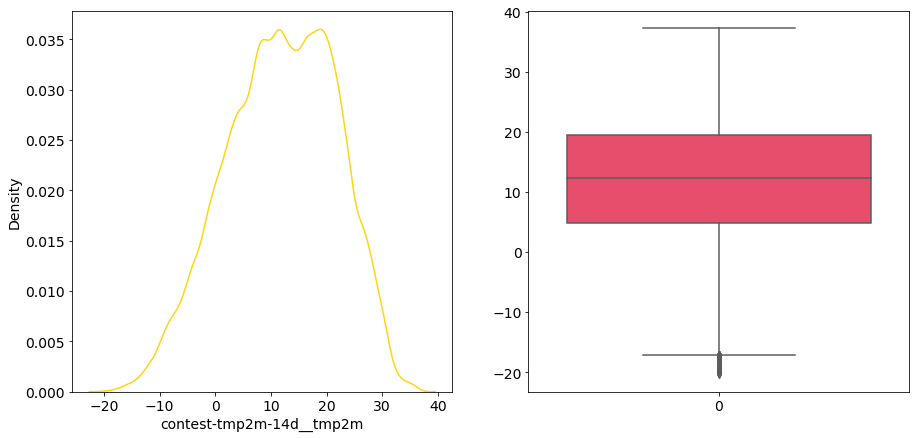

In [ ]:
import seaborn as sns
def target_var_visualized():
  plt.figure(figsize=(15,7))
  plt.subplot(121)
  sns.kdeplot(train_data['contest-tmp2m-14d__tmp2m'], color = "#ffd514")
  plt.subplot(122)
  sns.boxplot(data=train_data['contest-tmp2m-14d__tmp2m'], color = "#ff355d")
target_var_visualized()

In [ ]:
# Display the head of DataFrames and set the captions

display(train_data.head().style.set_caption("Training Dataset"))

display(test_data.head().style.set_caption("Test Dataset"))

In [ ]:
# check if a column exists in the test dataframe
if target_var in test_data.columns:
    print("The target column exists in the test dataframe")
else:
    print("The target column does not exist in the test dataframe")

The target column does not exist in the test dataframe


In [ ]:
# check if a column exists in the train dataframe
if target_var in train_data.columns:
    print("The target column exists in the train dataframe")
else:
    print("The target column does not exist in the train dataframe")

The target column exists in the train dataframe


In [ ]:
# check if a column exists in the train dataframe
if "climateregions__climateregion" in train_data.columns:
    print("The column exists in the dataframe")
else:
    print("The column does not exist in the dataframe")

The column exists in the dataframe


# **Distribution of Target Variable in Train & Test Data that contain 'tmp2m'**

In [ ]:
print(train_data.columns)

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)


In [ ]:
train_col = train_data.columns

for name in train_col:
  if "contest" in name:
    print(name)

contest-pevpr-sfc-gauss-14d__pevpr
contest-wind-h10-14d__wind-hgt-10
contest-rhum-sig995-14d__rhum
contest-wind-h100-14d__wind-hgt-100
contest-tmp2m-14d__tmp2m
contest-slp-14d__slp
contest-wind-vwnd-925-14d__wind-vwnd-925
contest-pres-sfc-gauss-14d__pres
contest-wind-uwnd-250-14d__wind-uwnd-250
contest-prwtr-eatm-14d__prwtr
contest-wind-vwnd-250-14d__wind-vwnd-250
contest-precip-14d__precip
contest-wind-h850-14d__wind-hgt-850
contest-wind-uwnd-925-14d__wind-uwnd-925
contest-wind-h500-14d__wind-hgt-500


In [ ]:
train_col = train_data.columns

for name in train_col:
  if "-34w" in name:
    print(name)

nmme0-tmp2m-34w__cancm30
nmme0-tmp2m-34w__cancm40
nmme0-tmp2m-34w__ccsm30
nmme0-tmp2m-34w__ccsm40
nmme0-tmp2m-34w__cfsv20
nmme0-tmp2m-34w__gfdlflora0
nmme0-tmp2m-34w__gfdlflorb0
nmme0-tmp2m-34w__gfdl0
nmme0-tmp2m-34w__nasa0
nmme0-tmp2m-34w__nmme0mean
nmme-prate-34w__cancm3
nmme-prate-34w__cancm4
nmme-prate-34w__ccsm3
nmme-prate-34w__ccsm4
nmme-prate-34w__cfsv2
nmme-prate-34w__gfdl
nmme-prate-34w__gfdlflora
nmme-prate-34w__gfdlflorb
nmme-prate-34w__nasa
nmme-prate-34w__nmmemean
nmme0-prate-34w__cancm30
nmme0-prate-34w__cancm40
nmme0-prate-34w__ccsm30
nmme0-prate-34w__ccsm40
nmme0-prate-34w__cfsv20
nmme0-prate-34w__gfdlflora0
nmme0-prate-34w__gfdlflorb0
nmme0-prate-34w__gfdl0
nmme0-prate-34w__nasa0
nmme0-prate-34w__nmme0mean
nmme-tmp2m-34w__cancm3
nmme-tmp2m-34w__cancm4
nmme-tmp2m-34w__ccsm3
nmme-tmp2m-34w__ccsm4
nmme-tmp2m-34w__cfsv2
nmme-tmp2m-34w__gfdl
nmme-tmp2m-34w__gfdlflora
nmme-tmp2m-34w__gfdlflorb
nmme-tmp2m-34w__nasa
nmme-tmp2m-34w__nmmemean


In [ ]:
train_col = train_data.columns

for name in train_col:
  if "-56w" in name:
    print(name)

nmme-tmp2m-56w__cancm3
nmme-tmp2m-56w__cancm4
nmme-tmp2m-56w__ccsm3
nmme-tmp2m-56w__ccsm4
nmme-tmp2m-56w__cfsv2
nmme-tmp2m-56w__gfdl
nmme-tmp2m-56w__gfdlflora
nmme-tmp2m-56w__gfdlflorb
nmme-tmp2m-56w__nasa
nmme-tmp2m-56w__nmmemean
nmme0-prate-56w__cancm30
nmme0-prate-56w__cancm40
nmme0-prate-56w__ccsm30
nmme0-prate-56w__ccsm40
nmme0-prate-56w__cfsv20
nmme0-prate-56w__gfdlflora0
nmme0-prate-56w__gfdlflorb0
nmme0-prate-56w__gfdl0
nmme0-prate-56w__nasa0
nmme0-prate-56w__nmme0mean
nmme-prate-56w__cancm3
nmme-prate-56w__cancm4
nmme-prate-56w__ccsm3
nmme-prate-56w__ccsm4
nmme-prate-56w__cfsv2
nmme-prate-56w__gfdl
nmme-prate-56w__gfdlflora
nmme-prate-56w__gfdlflorb
nmme-prate-56w__nasa
nmme-prate-56w__nmmemean


In [ ]:
train_col = train_data.columns

for name in train_col:
  if "-14d" in name:
    print(name)

contest-pevpr-sfc-gauss-14d__pevpr
contest-wind-h10-14d__wind-hgt-10
contest-rhum-sig995-14d__rhum
contest-wind-h100-14d__wind-hgt-100
contest-tmp2m-14d__tmp2m
contest-slp-14d__slp
contest-wind-vwnd-925-14d__wind-vwnd-925
contest-pres-sfc-gauss-14d__pres
contest-wind-uwnd-250-14d__wind-uwnd-250
contest-prwtr-eatm-14d__prwtr
contest-wind-vwnd-250-14d__wind-vwnd-250
contest-precip-14d__precip
contest-wind-h850-14d__wind-hgt-850
contest-wind-uwnd-925-14d__wind-uwnd-925
contest-wind-h500-14d__wind-hgt-500


In [ ]:
train_col = train_data.columns

for name in train_col:
  if "tmp2m" in name:
    print(name)

nmme0-tmp2m-34w__cancm30
nmme0-tmp2m-34w__cancm40
nmme0-tmp2m-34w__ccsm30
nmme0-tmp2m-34w__ccsm40
nmme0-tmp2m-34w__cfsv20
nmme0-tmp2m-34w__gfdlflora0
nmme0-tmp2m-34w__gfdlflorb0
nmme0-tmp2m-34w__gfdl0
nmme0-tmp2m-34w__nasa0
nmme0-tmp2m-34w__nmme0mean
nmme-tmp2m-56w__cancm3
nmme-tmp2m-56w__cancm4
nmme-tmp2m-56w__ccsm3
nmme-tmp2m-56w__ccsm4
nmme-tmp2m-56w__cfsv2
nmme-tmp2m-56w__gfdl
nmme-tmp2m-56w__gfdlflora
nmme-tmp2m-56w__gfdlflorb
nmme-tmp2m-56w__nasa
nmme-tmp2m-56w__nmmemean
contest-tmp2m-14d__tmp2m
nmme-tmp2m-34w__cancm3
nmme-tmp2m-34w__cancm4
nmme-tmp2m-34w__ccsm3
nmme-tmp2m-34w__ccsm4
nmme-tmp2m-34w__cfsv2
nmme-tmp2m-34w__gfdl
nmme-tmp2m-34w__gfdlflora
nmme-tmp2m-34w__gfdlflorb
nmme-tmp2m-34w__nasa
nmme-tmp2m-34w__nmmemean


# **Feature Engineering**

In [ ]:
# let's make copy of train and test dataframes and start data manipulation ,data preprocessing etc.

train_data1 = train_data.copy()
test_data1 = test_data.copy()

In [ ]:
train_data1.head()

index  lat       lon startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      0  0.0  0.833333    9/1/14                              237.00   
1      1  0.0  0.833333    9/2/14                              228.90   
2      2  0.0  0.833333    9/3/14                              220.69   
3      3  0.0  0.833333    9/4/14                              225.28   
4      4  0.0  0.833333    9/5/14                              237.24   

   nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                     29.02                     31.64   
1                     29.02                     31.64   
2                     29.02                     31.64   
3                     29.02                     31.64   
4                     29.02                     31.64   

   nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
0                    29.57                    30.73                    29.71   
1                    29.57                    30.73                    29.71   
2                    29.57                    30.73                    29.71   
3                    29.57                    30.73                    29.71   
4                    29.57                    30.73                    29.71   

   ...  wind-vwnd-925-2010-11  wind-vwnd-925-2010-12  wind-vwnd-925-2010-13  \
0  ...                 -27.68                 -37.21                   8.32   
1  ...                 -21.13                 -36.57                   8.77   
2  ...                 -10.72                 -34.16                   6.99   
3  ...                   0.33                 -31.04                   6.17   
4  ...                   9.83                 -31.80                   7.47   

   wind-vwnd-925-2010-14  wind-vwnd-925-2010-15  wind-vwnd-925-2010-16  \
0                   9.56                  -2.03                  48.13   
1                  21.17                   4.44                  48.60   
2                  32.16                   5.01                  48.53   
3                  39.66                  -1.41                  50.59   
4                  38.62                  -5.21                  54.73   

   wind-vwnd-925-2010-17  wind-vwnd-925-2010-18  wind-vwnd-925-2010-19  \
0                  28.09                 -13.50                  11.90   
1                  27.41                 -23.77                  15.44   
2                  19.21                 -33.16                  15.11   
3                   8.29                 -37.22                  18.24   
4                  -2.58                 -42.30                  21.91   

   wind-vwnd-925-2010-20  
0                   4.58  
1                   3.42  
2                   4.82  
3                   9.74  
4                  10.95  

[5 rows x 246 columns]

# **Extracting Month, Day, Year**

In [ ]:
train_data1["startdate"] = pd.to_datetime(train_data["startdate"], format='%m/%d/%y')
train_data1["year"] = train_data1["startdate"].dt.year
train_data1["month"] = train_data1["startdate"].dt.month
train_data1["day"] = train_data1["startdate"].dt.day
train_data1["climateregions__climateregion"] = train_data1['climateregions__climateregion'].astype('category')

train_data_selected = train_data1[["climateregions__climateregion", "year", "month", "day"]]
train_data_selected
#train_data_selected.describe()

climateregions__climateregion  year  month  day
0                                BSh  2014      9    1
1                                BSh  2014      9    2
2                                BSh  2014      9    3
3                                BSh  2014      9    4
4                                BSh  2014      9    5
...                              ...   ...    ...  ...
375729                           Dfb  2016      8   27
375730                           Dfb  2016      8   28
375731                           Dfb  2016      8   29
375732                           Dfb  2016      8   30
375733                           Dfb  2016      8   31

[375734 rows x 4 columns]

In [ ]:
grouped_month = train_data1.groupby(['month', 'climateregions__climateregion']).size().reset_index(name='counts')
print(grouped_month)

     month climateregions__climateregion  counts
0        1                           BSh     434
1        1                           BSk   11842
2        1                           BWh     806
3        1                           BWk    1178
4        1                           Cfa    4402
..     ...                           ...     ...
175     12                           Dfc    1054
176     12                           Dsb     682
177     12                           Dsc     248
178     12                           Dwa     124
179     12                           Dwb      62

[180 rows x 3 columns]


In [ ]:
grouped_year = train_data1.groupby(['year', 'climateregions__climateregion']).size().reset_index(name='counts')
print(grouped_year)


    year climateregions__climateregion  counts
0   2014                           BSh     854
1   2014                           BSk   23302
2   2014                           BWh    1586
3   2014                           BWk    2318
4   2014                           Cfa    8662
5   2014                           Cfb     732
6   2014                           Csa    1586
7   2014                           Csb    6832
8   2014                           Dfa    3782
9   2014                           Dfb    8784
10  2014                           Dfc    2074
11  2014                           Dsb    1342
12  2014                           Dsc     488
13  2014                           Dwa     244
14  2014                           Dwb     122
15  2015                           BSh    2555
16  2015                           BSk   69715
17  2015                           BWh    4745
18  2015                           BWk    6935
19  2015                           Cfa   25915
20  2015     

In [ ]:
grouped_month_year = train_data1.groupby("month", "climateregion__climateregion", "year").size().reset_index(name = "counts")

ValueError: ignored

# **Checking if the values in the 'year' column are all greater than or equal to 2014 and all less than or equal to 2016**

In [ ]:
assert (train_data1['year'] >= 2014).all() and (train_data1['year'] <= 2016).all(), "Year is outside the range of 2014-2016."
assert (train_data1['year'].astype(int) == train_data1['year']).all(), "Year is not an integer value."


In [ ]:
try:
    assert (train_data1['year'] >= 2014).all() and (train_data1['year'] <= 2016).all(), "Year is outside the range of 2014-2016."
    assert (train_data1['year'].astype(int) == train_data1['year']).all(), "Year is not an integer value."
    print("All assertions passed.")
except AssertionError as e:
    print(e)


All assertions passed.


# **Check the distribution of a variable 'counts' by the grouping of another variable 'year'.**

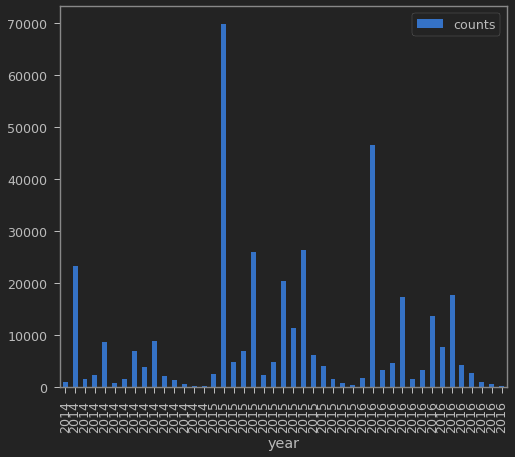

In [ ]:
import matplotlib.pyplot as plt
grouped_year.plot.bar(x='year', y='counts')
plt.show()

# **visualize the average temperature over time, grouped by year and month.**

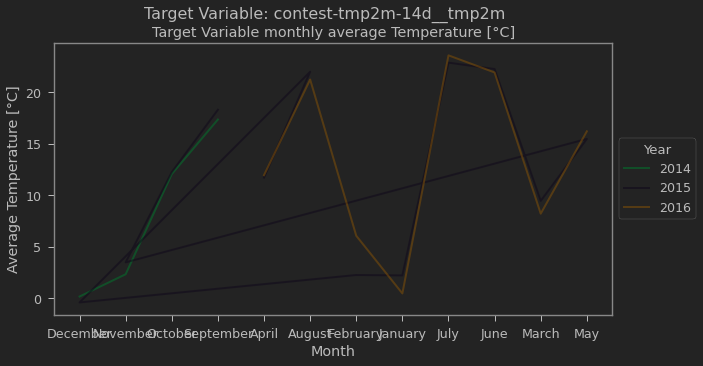

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train_data1 =train_data1.assign(
  month=pd.DatetimeIndex(train_data1['startdate']).month_name(),
  year=pd.DatetimeIndex(train_data1['startdate']).year
)

grouped_col = train_data1.groupby(['year', 'month'])['contest-tmp2m-14d__tmp2m'].mean().reset_index()

plt.figure(figsize=(10, 5))

for year, color in zip([2014, 2015, 2016], ['#01792E', '#0F071A', '#875306']):
    year_data = grouped_col[grouped_col['year'] == year]
    plt.plot(year_data['month'], year_data['contest-tmp2m-14d__tmp2m'], color=color, linewidth=2, alpha=0.5, label=year)

plt.xlabel('Month')
plt.ylabel('Average Temperature [°C]')
plt.title('Target Variable monthly average Temperature [°C]')
plt.suptitle('Target Variable: contest-tmp2m-14d__tmp2m')
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Findings:

2014: starts from Sep to Dec,

2015: whole year, and

2016: from Jan to Aug

Target Variable distribution by Regions

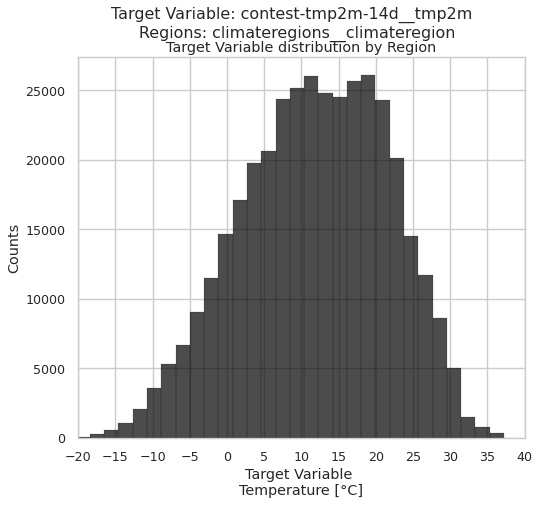

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.hist(train_data1['contest-tmp2m-14d__tmp2m'], bins=30, color='#000000', alpha=0.7, edgecolor='black')
plt.xlim(-20, 40) #showing x-axis limit from -20,40
plt.xticks(np.arange(-20, 45, 5))
plt.xlabel("Target Variable \nTemperature [°C]")
plt.ylabel("Counts")
plt.title("Target Variable distribution by Region")
plt.suptitle("Target Variable: contest-tmp2m-14d__tmp2m \n Regions: climateregions__climateregion")
plt.show()

In [ ]:
train_data.shape

(375734, 246)

In [ ]:
train_data1.shape

(375734, 249)

In [ ]:
test_data.shape

(31354, 245)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [ ]:
train_data.describe()

index            lat            lon  \
count  375734.000000  375734.000000  375734.000000   
mean   187866.500000       0.592766       0.517964   
std    108465.207359       0.251744       0.272059   
min         0.000000       0.000000       0.000000   
25%     93933.250000       0.409091       0.300000   
50%    187866.500000       0.590909       0.533333   
75%    281799.750000       0.818182       0.766667   
max    375733.000000       1.000000       1.000000   

       contest-pevpr-sfc-gauss-14d__pevpr  nmme0-tmp2m-34w__cancm30  \
count                       375734.000000             375734.000000   
mean                           276.744064                 10.801682   
std                            198.085182                 10.952417   
min                             -2.310000                -14.960000   
25%                            104.062500                  1.550000   
50%                            250.320000                  9.950000   
75%                            420.010000                 20.230000   
max                           1185.140000                 36.080000   

       nmme0-tmp2m-34w__cancm40  nmme0-tmp2m-34w__ccsm30  \
count             375734.000000            359800.000000   
mean                  12.726739                10.099323   
std                   11.073553                10.339626   
min                  -14.970000               -11.720000   
25%                    3.650000                 1.640000   
50%                   11.890000                 9.490000   
75%                   22.110000                18.740000   
max                   36.030000                33.390000   

       nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
count            375734.000000            375734.000000   
mean                 11.638229                10.733886   
std                  10.574276                 9.403434   
min                 -17.560000               -13.720000   
25%                   3.080000                 3.390000   
50%                  11.600000                10.890000   
75%                  20.360000                18.330000   
max                  34.640000                35.750000   

       nmme0-tmp2m-34w__gfdlflora0  ...  wind-vwnd-925-2010-11  \
count                375734.000000  ...          375734.000000   
mean                     11.772646  ...              -1.209959   
std                      10.689967  ...              37.317333   
min                     -13.330000  ...             -94.570000   
25%                       2.970000  ...             -27.200000   
50%                      11.280000  ...              -3.200000   
75%                      20.300000  ...              24.940000   
max                      38.350000  ...             113.920000   

       wind-vwnd-925-2010-12  wind-vwnd-925-2010-13  wind-vwnd-925-2010-14  \
count          375734.000000          375734.000000          375734.000000   
mean               -8.109918               6.800684              19.251970   
std                36.201507              38.458878              25.288526   
min               -89.940000             -64.870000             -39.280000   
25%               -33.350000             -19.650000               1.960000   
50%                -9.390000               2.330000              20.050000   
75%                17.960000              28.660000              35.090000   
max                96.550000             106.420000              91.760000   

       wind-vwnd-925-2010-15  wind-vwnd-925-2010-16  wind-vwnd-925-2010-17  \
count          375734.000000          375734.000000          375734.000000   
mean              -17.697565              -9.846867              -6.231860   
std                31.946748              34.164678              27.050356   
min              -100.560000            -106.080000             -93.980000   
25%               -40.030000             -32.170000             -20.170000   
50%               -16.710000              -8.5600

# **Properties of Target Variable**

count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64
0


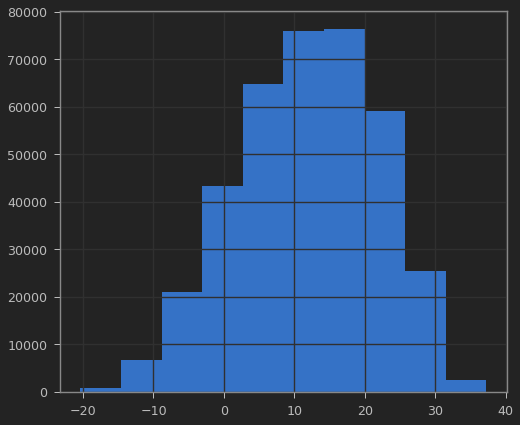

In [ ]:
# Assume the target variable is in the 'target' column
target_col = 'contest-tmp2m-14d__tmp2m'

# Check the summary statistics of the target variable
print(train_data[target_col].describe())

# Check the distribution of the target variable
train_data[target_col].hist()

# Check for missing values in the target variable
print(train_data[target_col].isnull().sum())

We have a time series problem but we have big time gap between the training and the testing data.

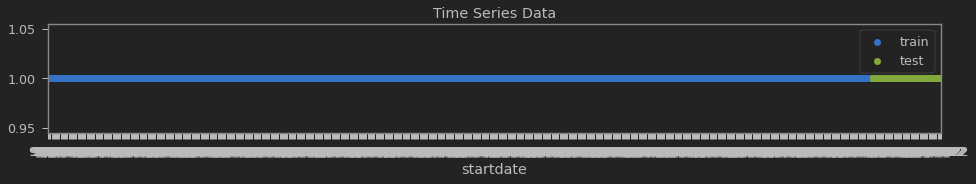

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,2))
ax.set_title('Time Series Data')
sns.scatterplot(data = train_data, x = 'startdate', y = 1, marker='o', linewidth=0, label = 'train')
sns.scatterplot(data = test_data, x = 'startdate', y = 1, marker='o', linewidth=0, label = 'test')
ax.set_xlim([train_data['startdate'].iloc[0], test_data['startdate'].iloc[-1]])
plt.show()

In [ ]:
print(train_data.dtypes)

index                                   int64
lat                                   float64
lon                                   float64
startdate                              object
contest-pevpr-sfc-gauss-14d__pevpr    float64
                                       ...   
wind-vwnd-925-2010-16                 float64
wind-vwnd-925-2010-17                 float64
wind-vwnd-925-2010-18                 float64
wind-vwnd-925-2010-19                 float64
wind-vwnd-925-2010-20                 float64
Length: 246, dtype: object


In [ ]:
# get names of columns of object and int data type

train_cols = train_data.columns.to_numpy() # converts columns to numpy array

obj_cols = []
int_cols = []

for column in train_cols:
        if train_data[column].dtype == "object":
            obj_cols.append(column)

        elif train_data[column].dtype == "int64":
            int_cols.append(column)

print(obj_cols)
print(int_cols)

['startdate', 'climateregions__climateregion']
['index', 'mjo1d__phase', 'mei__meirank', 'mei__nip']


In [ ]:
train_data['startdate'] = pd.to_datetime(train_data['startdate'])

test_data['startdate'] = pd.to_datetime(test_data['startdate'])

print(train_data['startdate'].dtype)
print(test_data['startdate'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
print(train_data['startdate'].min())

print(train_data['startdate'].max())

print(train_data['startdate'].max() - train_data['startdate'].min())

2014-09-01 00:00:00
2016-08-31 00:00:00
730 days 00:00:00


In [ ]:
print(test_data['startdate'].min())

print(test_data['startdate'].max())

print(test_data['startdate'].max() - test_data['startdate'].min())

2022-11-01 00:00:00
2022-12-31 00:00:00
60 days 00:00:00


In [ ]:
train_min_date = train_data['startdate'].min()
train_max_date = train_data['startdate'].max()
test_min_date = test_data['startdate'].min()
test_max_date = test_data['startdate'].max()

# **Checking the gap between the years in Train and Test Data**

In [ ]:
# Calculate the year difference between the maximum year in the train dataset and the minimum year in the test dataset
year_difference = (test_min_date - train_max_date).days / 365.25

print(f"The year difference between the train and test datasets is {year_difference:.2f} years.")

The year difference between the train and test datasets is 6.17 years.


In [ ]:
if test_max_date < train_min_date or test_min_date > train_max_date:
    print("There is no overlap between the training and test years.")
else:
    overlap_start = max(test_min_date, train_min_date)
    overlap_end = min(test_max_date, train_max_date)
    gap = overlap_start - overlap_end
    print("The gap between the year ranges of the training and test datasets is:", gap)


There is no overlap between the training and test years.


In [ ]:
gap_years = test_min_date - train_max_date
print("There are", gap_years, "years of gap between the training and test data.")

There are 2253 days 00:00:00 years of gap between the training and test data.


In [ ]:
train_data['startdate'].value_counts()

2014-09-01    514
2015-12-25    514
2015-12-27    514
2015-12-28    514
2015-12-29    514
             ... 
2015-05-04    514
2015-05-05    514
2015-05-06    514
2015-05-07    514
2016-08-31    514
Name: startdate, Length: 731, dtype: int64

In [ ]:
climate_regions = train_data['climateregions__climateregion'].unique().tolist() # convert to list for later use in visualisations

print(f"There are {len(climate_regions)} unique climate regions in training dataset")

climate_regions

There are 15 unique climate regions in training dataset


['BSh',
 'Cfa',
 'BSk',
 'BWk',
 'BWh',
 'Csa',
 'Csb',
 'Cfb',
 'Dfb',
 'Dsc',
 'Dfc',
 'Dfa',
 'Dsb',
 'Dwa',
 'Dwb']

In [ ]:
region_data_points = train_data['climateregions__climateregion'].value_counts()

region_data_points

BSk    139621
Dfb     52632
Cfa     51901
Csb     40936
Dfa     22661
BWk     13889
Dfc     12427
BWh      9503
Csa      9503
Dsb      8041
BSh      5117
Cfb      4386
Dsc      2924
Dwa      1462
Dwb       731
Name: climateregions__climateregion, dtype: int64

# **plotting a histogram of the distribution of the target variable "contest-tmp2m-14d__tmp2m"**

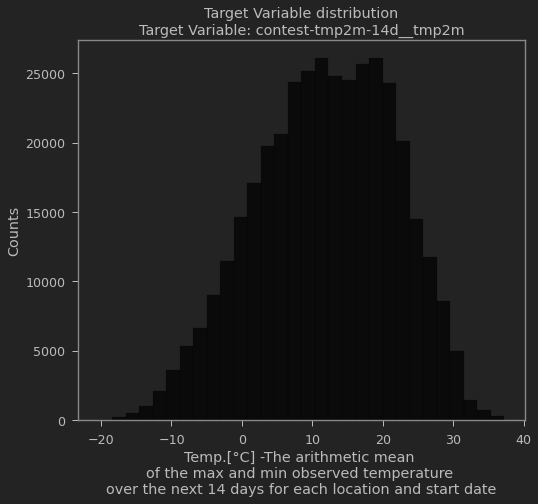

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

np.random.seed(345)

# Shapiro test
train_data_selected = train_data1[["contest-tmp2m-14d__tmp2m"]].sample(5000)
train_data_selected_col = train_data_selected["contest-tmp2m-14d__tmp2m"]
_, p_value = shapiro(train_data_selected_col)

# Histogram
plt.hist(train_data1["contest-tmp2m-14d__tmp2m"], bins=30, color='#000000', alpha=0.7, edgecolor='black')
plt.xlabel("Temp.[°C] -The arithmetic mean \nof the max and min observed temperature \nover the next 14 days for each location and start date")
plt.ylabel("Counts")
plt.title("Target Variable distribution\nTarget Variable: contest-tmp2m-14d__tmp2m")
plt.show()


We have different locations, between training and test data


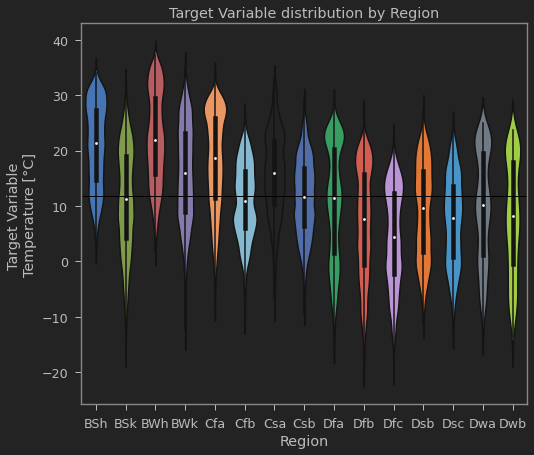

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.violinplot(x="climateregions__climateregion", y="contest-tmp2m-14d__tmp2m", data=train_data1)
plt.axhline(train_data1['contest-tmp2m-14d__tmp2m'].mean(), color='black', linewidth=1)
plt.title("Target Variable distribution by Region")
plt.xlabel("Region")
plt.ylabel("Target Variable \nTemperature [\u00B0C]")
plt.show()


# **checking the distribution of data which contain some missing values with respect to a target variable**


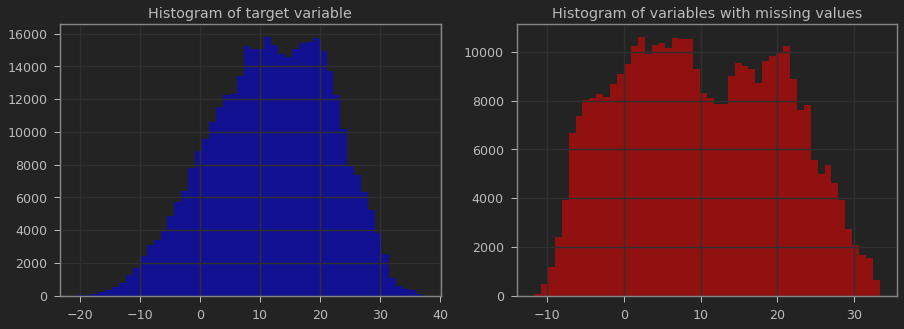

In [ ]:

# Select the target variable
y = train_data["contest-tmp2m-14d__tmp2m"]

# Select the variables with missing values
X = train_data["nmme0-tmp2m-34w__ccsm30"]
# Plot histograms of the target variable and variables with missing values
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
y.hist(bins=50, ax=axs[0], color="blue", alpha=0.5)
axs[0].set_title("Histogram of target variable")
X.hist(bins=50, ax=axs[1], color="red", alpha=0.5)
axs[1].set_title("Histogram of variables with missing values")
plt.show()


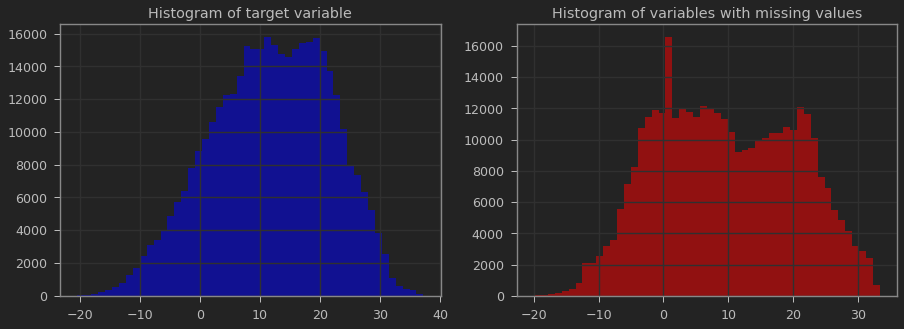

In [ ]:
# Select the target variable
y = train_data["contest-tmp2m-14d__tmp2m"]

# Select the variables with missing values
X = train_data["nmme-tmp2m-56w__ccsm3"]
# Plot histograms of the target variable and variables with missing values
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
y.hist(bins=50, ax=axs[0], color="blue", alpha=0.5)
axs[0].set_title("Histogram of target variable")
X.hist(bins=50, ax=axs[1], color="red", alpha=0.5)
axs[1].set_title("Histogram of variables with missing values")
plt.show()

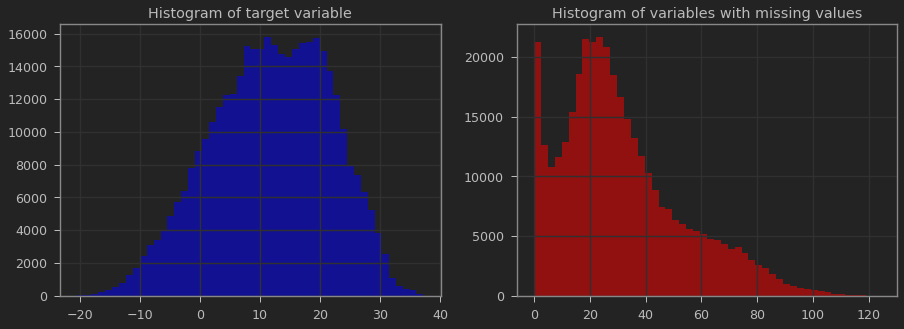

In [ ]:
# Select the target variable
y = train_data["contest-tmp2m-14d__tmp2m"]

# Select the variables with missing values
X = train_data["nmme-prate-34w__ccsm3"]
# Plot histograms of the target variable and variables with missing values
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
y.hist(bins=50, ax=axs[0], color="blue", alpha=0.5)
axs[0].set_title("Histogram of target variable")
X.hist(bins=50, ax=axs[1], color="red", alpha=0.5)
axs[1].set_title("Histogram of variables with missing values")
plt.show()

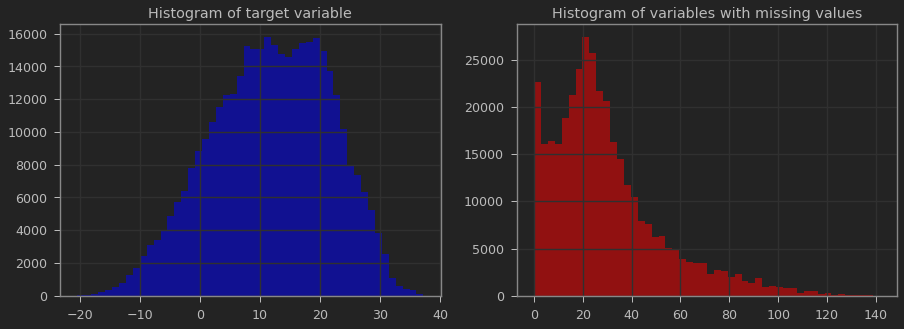

In [ ]:
# Select the target variable
y = train_data["contest-tmp2m-14d__tmp2m"]

# Select the variables with missing values
X = train_data["nmme0-prate-56w__ccsm30"]
# Plot histograms of the target variable and variables with missing values
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
y.hist(bins=50, ax=axs[0], color="blue", alpha=0.5)
axs[0].set_title("Histogram of target variable")
X.hist(bins=50, ax=axs[1], color="red", alpha=0.5)
axs[1].set_title("Histogram of variables with missing values")
plt.show()

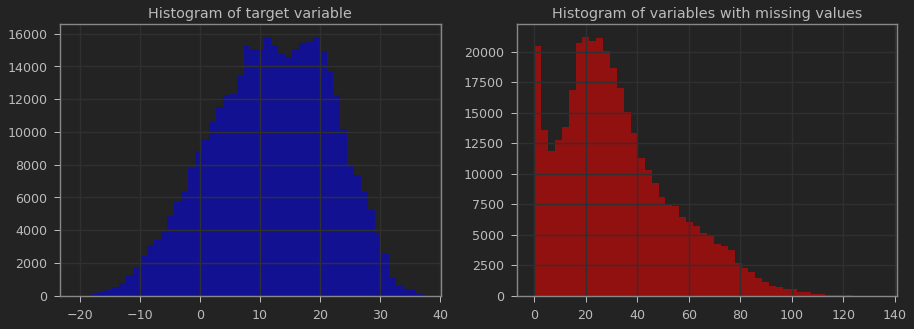

In [ ]:
# Select the target variable
y = train_data["contest-tmp2m-14d__tmp2m"]

# Select the variables with missing values
X = train_data["nmme-prate-56w__ccsm3"]
# Plot histograms of the target variable and variables with missing values
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
y.hist(bins=50, ax=axs[0], color="blue", alpha=0.5)
axs[0].set_title("Histogram of target variable")
X.hist(bins=50, ax=axs[1], color="red", alpha=0.5)
axs[1].set_title("Histogram of variables with missing values")
plt.show()

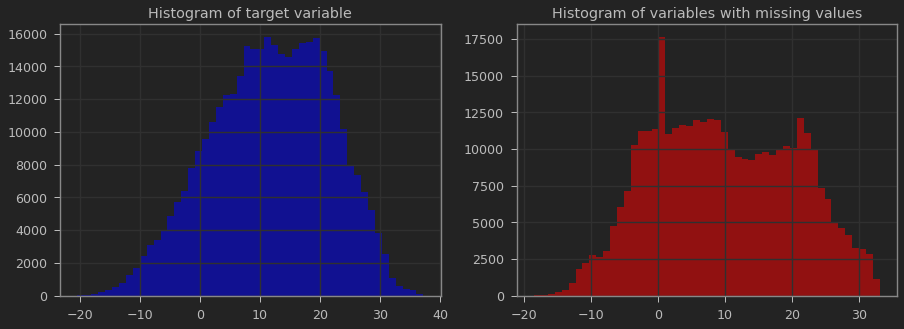

In [ ]:
# Select the target variable
y = train_data["contest-tmp2m-14d__tmp2m"]

# Select the variables with missing values
X = train_data["nmme-tmp2m-34w__ccsm3"]
# Plot histograms of the target variable and variables with missing values
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
y.hist(bins=50, ax=axs[0], color="blue", alpha=0.5)
axs[0].set_title("Histogram of target variable")
X.hist(bins=50, ax=axs[1], color="red", alpha=0.5)
axs[1].set_title("Histogram of variables with missing values")
plt.show()

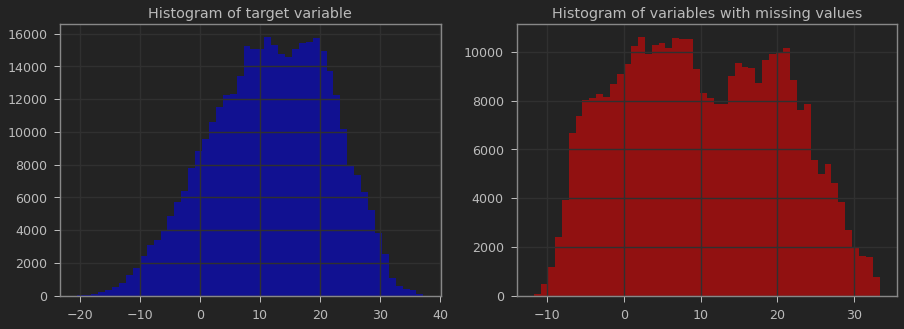

In [ ]:
# Select the target variable
y = train_data["contest-tmp2m-14d__tmp2m"]

# Select the variables with missing values
X = train_data["ccsm30"]
# Plot histograms of the target variable and variables with missing values
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
y.hist(bins=50, ax=axs[0], color="blue", alpha=0.5)
axs[0].set_title("Histogram of target variable")
X.hist(bins=50, ax=axs[1], color="red", alpha=0.5)
axs[1].set_title("Histogram of variables with missing values")
plt.show()

# Work on Missing Values

In [ ]:
# let's make copy of train and test dataframes and start data manipulation ,data preprocessing etc.

train_data2 = train_data.copy()
test_data2 = test_data.copy()

In [ ]:
# Let's take out percentage of missing values first. 
#Total number of missing values and percentage of missing values relative to the total number of values in each column.

missing_vals_col = []
def perc_missing_vals(df) : 
    for i in df :
        if df[i].isnull().sum() > 0 :
            missing_vals_col.append(i)
            missing_sum = df[i].isnull().sum()
            total_vals_i = len(df[i])
            perc = (missing_sum / total_vals_i)*100
            print(f"{i} has {perc:0.2f}% missing vals.")
        else : 
            continue 

perc_missing_vals(train_data2)

nmme0-tmp2m-34w__ccsm30 has 4.24% missing vals.
nmme-tmp2m-56w__ccsm3 has 2.74% missing vals.
nmme-prate-34w__ccsm3 has 2.33% missing vals.
nmme0-prate-56w__ccsm30 has 4.24% missing vals.
nmme0-prate-34w__ccsm30 has 4.24% missing vals.
nmme-prate-56w__ccsm3 has 2.74% missing vals.
nmme-tmp2m-34w__ccsm3 has 2.33% missing vals.
ccsm30 has 4.24% missing vals.


In [ ]:
# Check for missing values of train dataframe. 

def missing_vals(df): 
    for i in df :
        if df[i].isnull().sum() > 0 : 
            print(f"{i} : {df[i].isnull().sum()} missing values out of {len(df[i])}")
    else : 
        print("No missing columns.")

missing_vals(train_data2)

nmme0-tmp2m-34w__ccsm30 : 15934 missing values out of 375734
nmme-tmp2m-56w__ccsm3 : 10280 missing values out of 375734
nmme-prate-34w__ccsm3 : 8738 missing values out of 375734
nmme0-prate-56w__ccsm30 : 15934 missing values out of 375734
nmme0-prate-34w__ccsm30 : 15934 missing values out of 375734
nmme-prate-56w__ccsm3 : 10280 missing values out of 375734
nmme-tmp2m-34w__ccsm3 : 8738 missing values out of 375734
ccsm30 : 15934 missing values out of 375734
No missing columns.


In [ ]:
# Let's check if any row is duplicated or not ? 

def duplicated_func(df) : 
    print(f"total number of duplicated rows in data are : {df.duplicated().sum()}")

# Checking for train set. 
duplicated_func(train_data2)

total number of duplicated rows in data are : 0


In [ ]:
print(train_data2.isnull().values.sum())

101772


In [ ]:
# Total number of rows which contain a missing value

train_data2.isnull().any(axis=1).sum()

23130

In [ ]:
# Total number of columns which contain a missing value

train_data2.isnull().any(axis=0).sum()

8

In [ ]:
# This process gives us the total count of missing values in each column and convert it
# to numpy array so that we can later get the names of the columns which contain missing values

missing_vals_arr = train_data2.isnull().sum().to_numpy()

missing_vals_arr

array([    0,     0,     0,     0,     0,     0,     0, 15934,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
       10280,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,  8738,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0, 15934,     0,     0,     0,     0,
           0,     0,     0,     0,     0, 15934,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
       10280,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,  8738,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0, 15934,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
cols_with_missing_vals = [] # This variable stores the column names which contain missing values

for index, value in enumerate(missing_vals_arr):
    if value > 0:
        cols_with_missing_vals.append(train_cols[index])
       
print(cols_with_missing_vals)

['nmme0-tmp2m-34w__ccsm30', 'nmme-tmp2m-56w__ccsm3', 'nmme-prate-34w__ccsm3', 'nmme0-prate-56w__ccsm30', 'nmme0-prate-34w__ccsm30', 'nmme-prate-56w__ccsm3', 'nmme-tmp2m-34w__ccsm3', 'ccsm30']


# Missing values per column

In [ ]:
#Missing values per column

total_missing_vals_by_col = []

for index, column in enumerate(train_cols):
    if column in cols_with_missing_vals:
        total_missing_vals_by_col.append(missing_vals_arr[index])
  
print(total_missing_vals_by_col)

[15934, 10280, 8738, 15934, 15934, 10280, 8738, 15934]


# Arranging in Accending order

In [ ]:
#arrange in accending order
total_missing_vals_by_col.sort()

print(total_missing_vals_by_col)

[8738, 8738, 10280, 10280, 15934, 15934, 15934, 15934]


# Displaying all rows

In [ ]:
mask = train_data2.isnull().any(axis=1) # This gives us all the rows which contain a null value

missing_vals_df = train_data2.loc[mask, cols_with_missing_vals] # Use mask as row_indexer and cols_with_missing_vals as column_indexer

missing_vals_df.head(20)

nmme0-tmp2m-34w__ccsm30  nmme-tmp2m-56w__ccsm3  nmme-prate-34w__ccsm3  \
356                      NaN                  28.88                   0.64   
357                      NaN                  28.67                   0.57   
358                      NaN                  28.46                   0.50   
359                      NaN                  28.26                   0.43   
360                      NaN                  28.05                   0.36   
361                      NaN                  27.84                   0.29   
362                      NaN                  27.64                   0.21   
363                      NaN                  27.22                   0.14   
364                      NaN                  27.02                   0.07   
365                      NaN                  26.81                    NaN   
366                      NaN                  26.81                    NaN   
367                      NaN                  26.81                    NaN   
368                      NaN                  26.81                    NaN   
369                      NaN                  26.81                    NaN   
370                      NaN                    NaN                    NaN   
371                      NaN                    NaN                    NaN   
372                      NaN                    NaN                    NaN   
373                      NaN                    NaN                    NaN   
374                      NaN                    NaN                    NaN   
375                      NaN                    NaN                    NaN   

     nmme0-prate-56w__ccsm30  nmme0-prate-34w__ccsm30  nmme-prate-56w__ccsm3  \
356                    19.37                      NaN                   8.31   
357                    19.37                      NaN                   9.53   
358                    19.37                      NaN                  10.74   
359                    19.37                      NaN                  11.96   
360                    19.37                      NaN                  13.18   
361                    19.37                      NaN                  14.40   
362                    19.37                      NaN                  15.61   
363                    19.37                      NaN                  18.05   
364                    19.37                      NaN                  19.27   
365                    19.37                      NaN                  20.48   
366                    19.37                      NaN                  20.48   
367                    19.37                      NaN                  20.48   
368                    19.37                      NaN                  20.48   
369                    19.37                      NaN                  20.48   
370                      NaN                      NaN                    NaN   
371                      NaN                      NaN                    NaN   
372                      NaN                      NaN                    NaN   
373                      NaN                      NaN                    NaN   
374                      NaN                      NaN                    NaN   
375                      NaN                      NaN                    NaN   

     nmme-tmp2m-34w__ccsm3  ccsm30  
356                   0.64   28.88  
357                   0.57   28.88  
358                   0.50   28.88  
359                   0.43   28.88  
360                   0.36   28.88  
361                   0.29   28.88  
362                   0.21   28.88  
363                   0.14   28.88  
364                   0.07   28.88  
365                    NaN   28.88  
366                    NaN   28.88  
367                    NaN   28.88  
368                    NaN   28.88  
369                    NaN   28.88  
370                    NaN     NaN  
371                    NaN     NaN  
372                    NaN     NaN  
373                

In [ ]:
def fill_missing_values(df):
    df['nmme0-prate-34w__ccsm30'] = df['nmme0-prate-34w__ccsm30'].fillna(df['nmme0-prate-34w__ccsm30'].mean())
    df['nmme0-tmp2m-34w__ccsm30'] = df['nmme0-tmp2m-34w__ccsm30'].fillna(df['nmme0-tmp2m-34w__ccsm30'].mean())
    df['ccsm30'] = df['ccsm30'].fillna(df['ccsm30'].mean())
    df['nmme0-prate-56w__ccsm30'] = df['nmme0-prate-56w__ccsm30'].fillna(df['nmme0-prate-56w__ccsm30'].mean())
    df['nmme-tmp2m-56w__ccsm3'] = df['nmme-tmp2m-56w__ccsm3'].fillna(df['nmme-tmp2m-56w__ccsm3'].mean())
    df['nmme-prate-56w__ccsm3'] = df['nmme-prate-56w__ccsm3'].fillna(df['nmme-prate-56w__ccsm3'].mean())
    df['nmme-tmp2m-34w__ccsm3'] = df['nmme-tmp2m-34w__ccsm3'].fillna(df['nmme-tmp2m-34w__ccsm3'].mean())
    df['nmme-prate-34w__ccsm3'] = df['nmme-prate-34w__ccsm3'].fillna(df['nmme-prate-34w__ccsm3'].mean())
    return df

fill_val_mean = fill_missing_values(train_data2)
fill_val_mean


index  lat       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0            0  0.0  0.833333 2014-09-01                              237.00   
1            1  0.0  0.833333 2014-09-02                              228.90   
2            2  0.0  0.833333 2014-09-03                              220.69   
3            3  0.0  0.833333 2014-09-04                              225.28   
4            4  0.0  0.833333 2014-09-05                              237.24   
...        ...  ...       ...        ...                                 ...   
375729  375729  1.0  0.866667 2016-08-27                              312.05   
375730  375730  1.0  0.866667 2016-08-28                              305.82   
375731  375731  1.0  0.866667 2016-08-29                              311.62   
375732  375732  1.0  0.866667 2016-08-30                              304.54   
375733  375733  1.0  0.866667 2016-08-31                              295.29   

        nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                          29.02                     31.64   
1                          29.02                     31.64   
2                          29.02                     31.64   
3                          29.02                     31.64   
4                          29.02                     31.64   
...                          ...                       ...   
375729                     23.13                     27.20   
375730                     23.13                     27.20   
375731                     23.13                     27.20   
375732                     23.13                     27.20   
375733                     23.13                     27.20   

        nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  \
0                         29.57                    30.73   
1                         29.57                    30.73   
2                         29.57                    30.73   
3                         29.57                    30.73   
4                         29.57                    30.73   
...                         ...                      ...   
375729                    20.25                    24.43   
375730                    20.25                    24.43   
375731                    20.25                    24.43   
375732                    20.25                    24.43   
375733                    20.25                    24.43   

        nmme0-tmp2m-34w__cfsv20  ...  wind-vwnd-925-2010-11  \
0                         29.71  ...                 -27.68   
1                         29.71  ...                 -21.13   
2                         29.71  ...                 -10.72   
3                         29.71  ...                   0.33   
4                         29.71  ...                   9.83   
...                         ...  ...                    ...   
375729                    18.35  ...                 -15.64   
375730                    18.35  ...                  -7.59   
375731                    18.35  ...                  -6.25   
375732                    18.35  ...                  -7.16   
375733                    18.35  ...                 -12.36   

        wind-vwnd-925-2010-12  wind-vwnd-925-2010-13  wind-vwnd-925-2010-14  \
0                      -37.21                   8.32                   9.56   
1                      -36.57                   8.77                  21.17   
2                      -34.16                   6.99                  32.16   
3                      -31.04                   6.17                  39.66   
4                      -31.80                   7.47                  38.62   
...                       ...                    ...                    ...   
375729                 -75.68                  -3.09                   6.93   
375730                 -76.42                 -13.55                  13.36   
375731                 -70.65                 -23.93                  22.62   
375732                 -57.67      

In [ ]:
print(train_data2.isnull().values.sum())

0


Plotting histograms and finfing Correlation Matrix  on train data

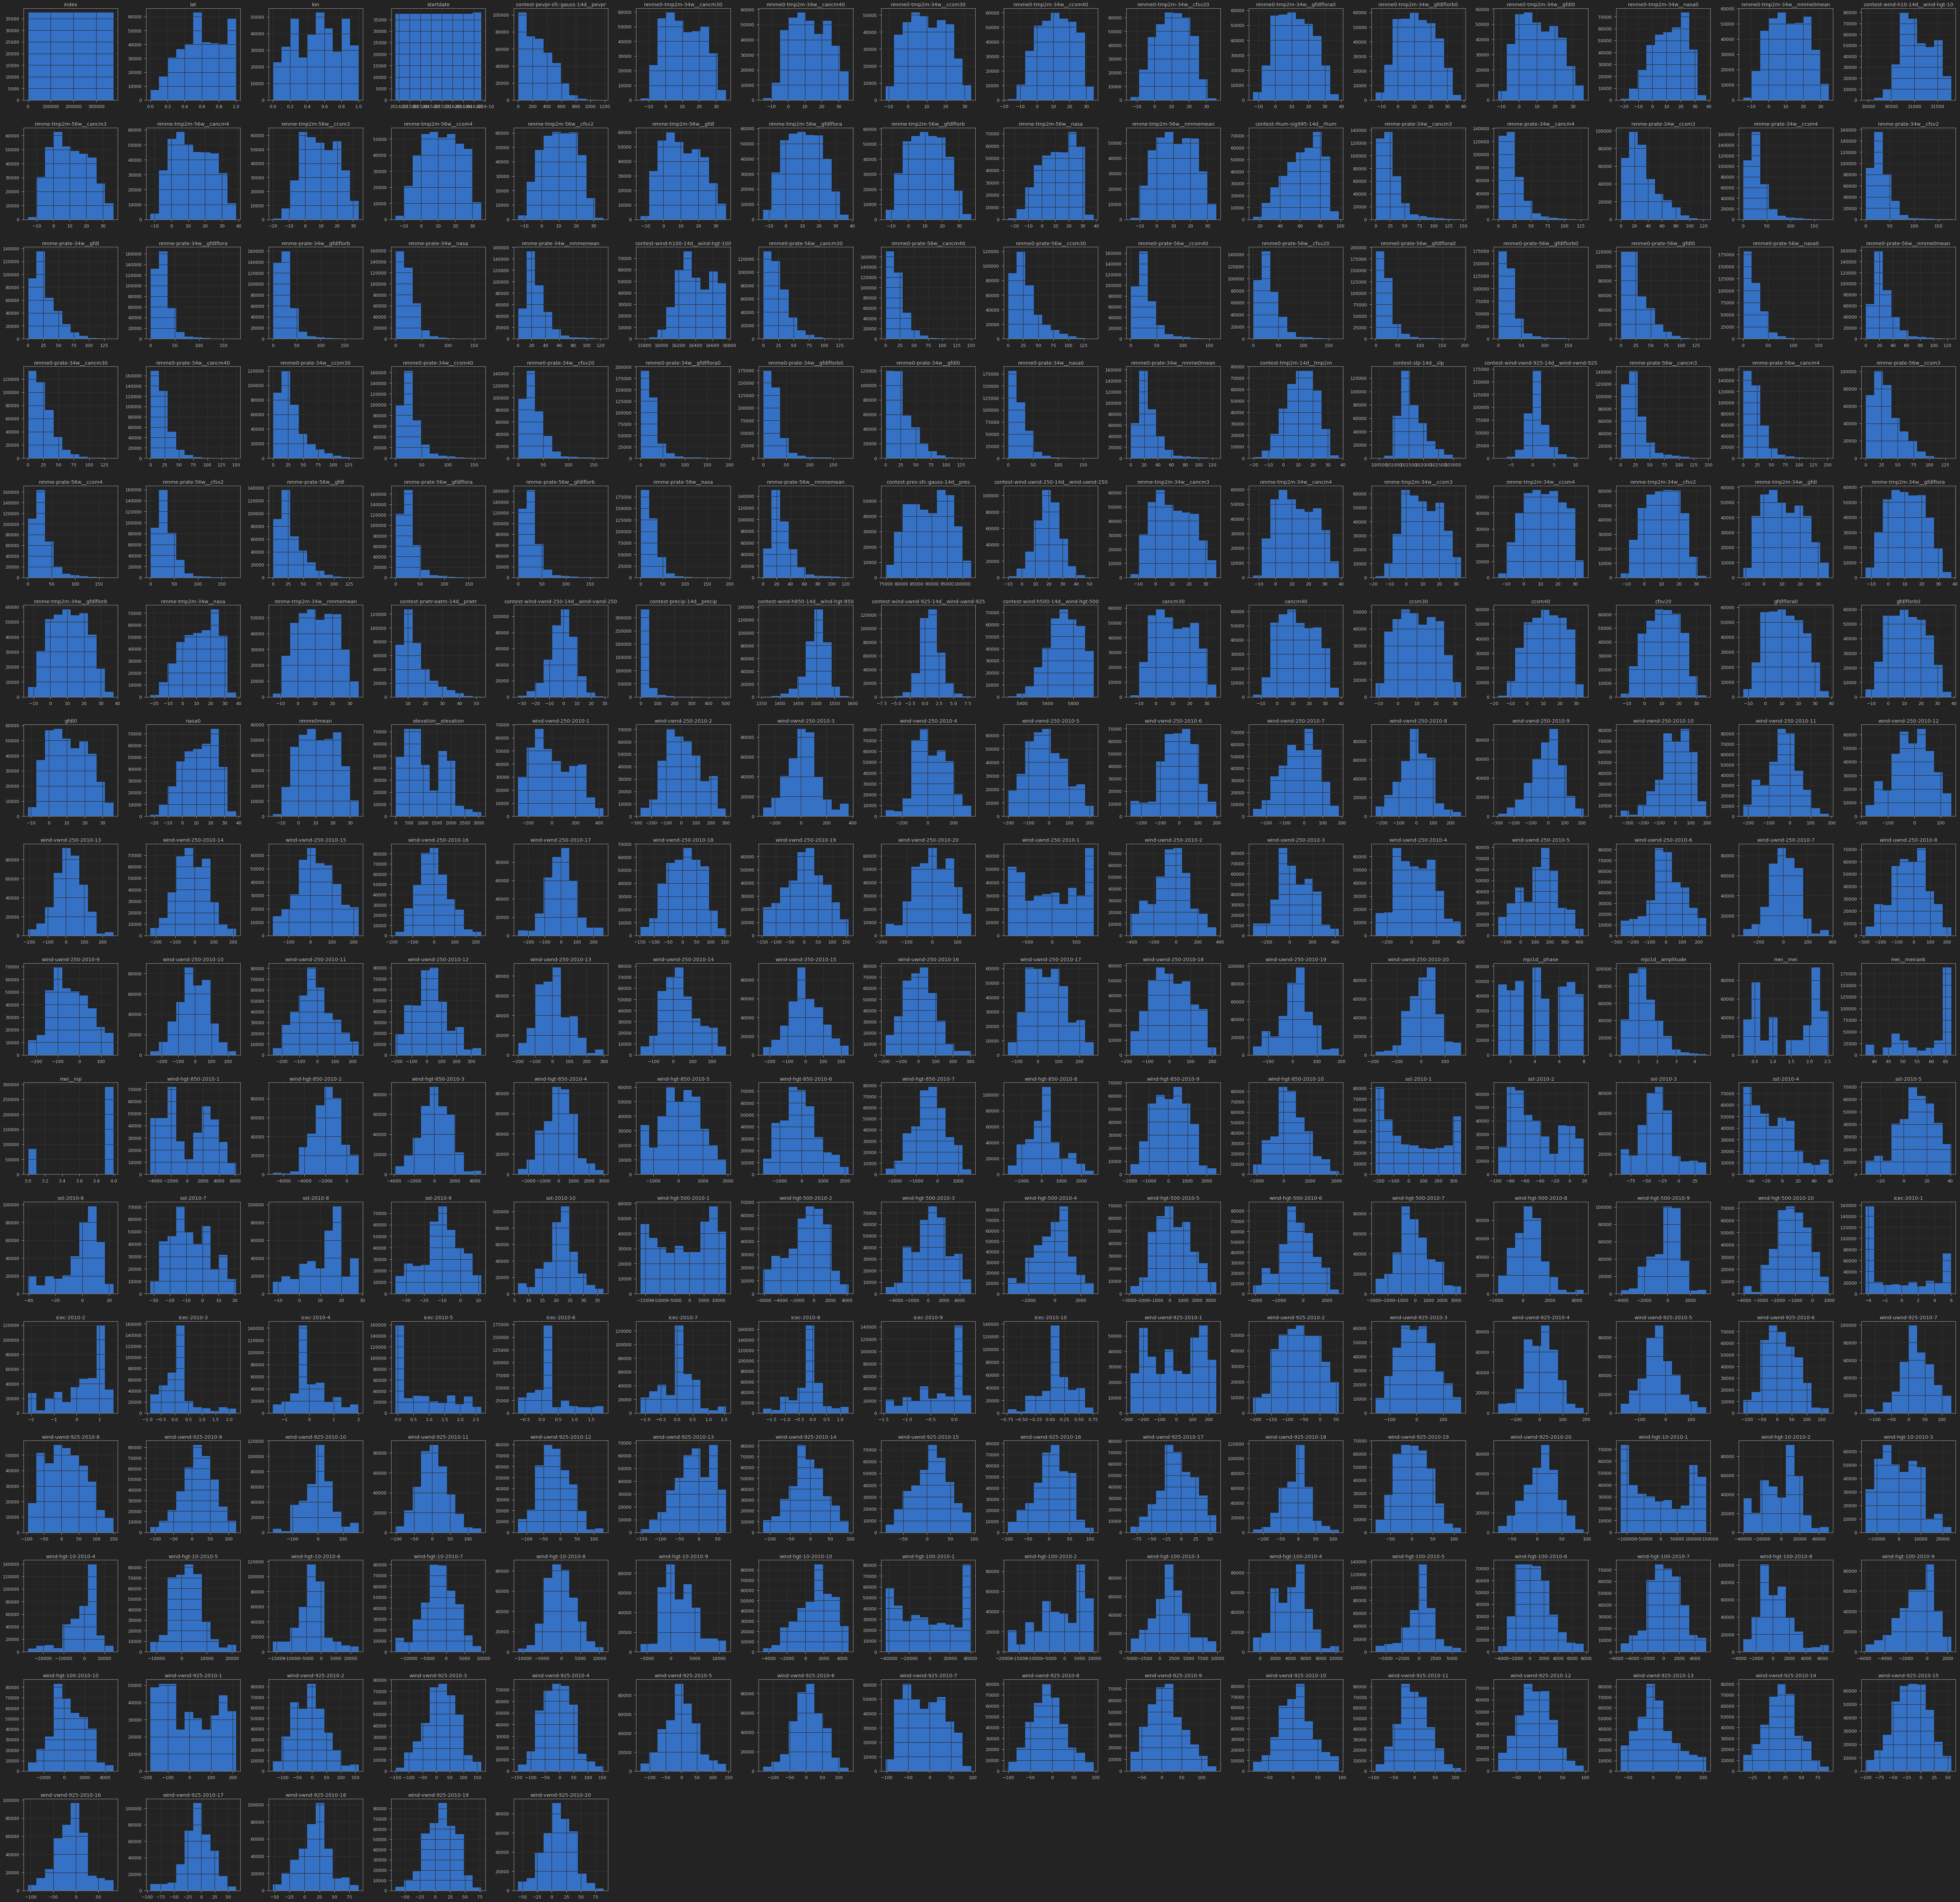

In [ ]:
train_data.hist(figsize = (100, 100))
plt.show()

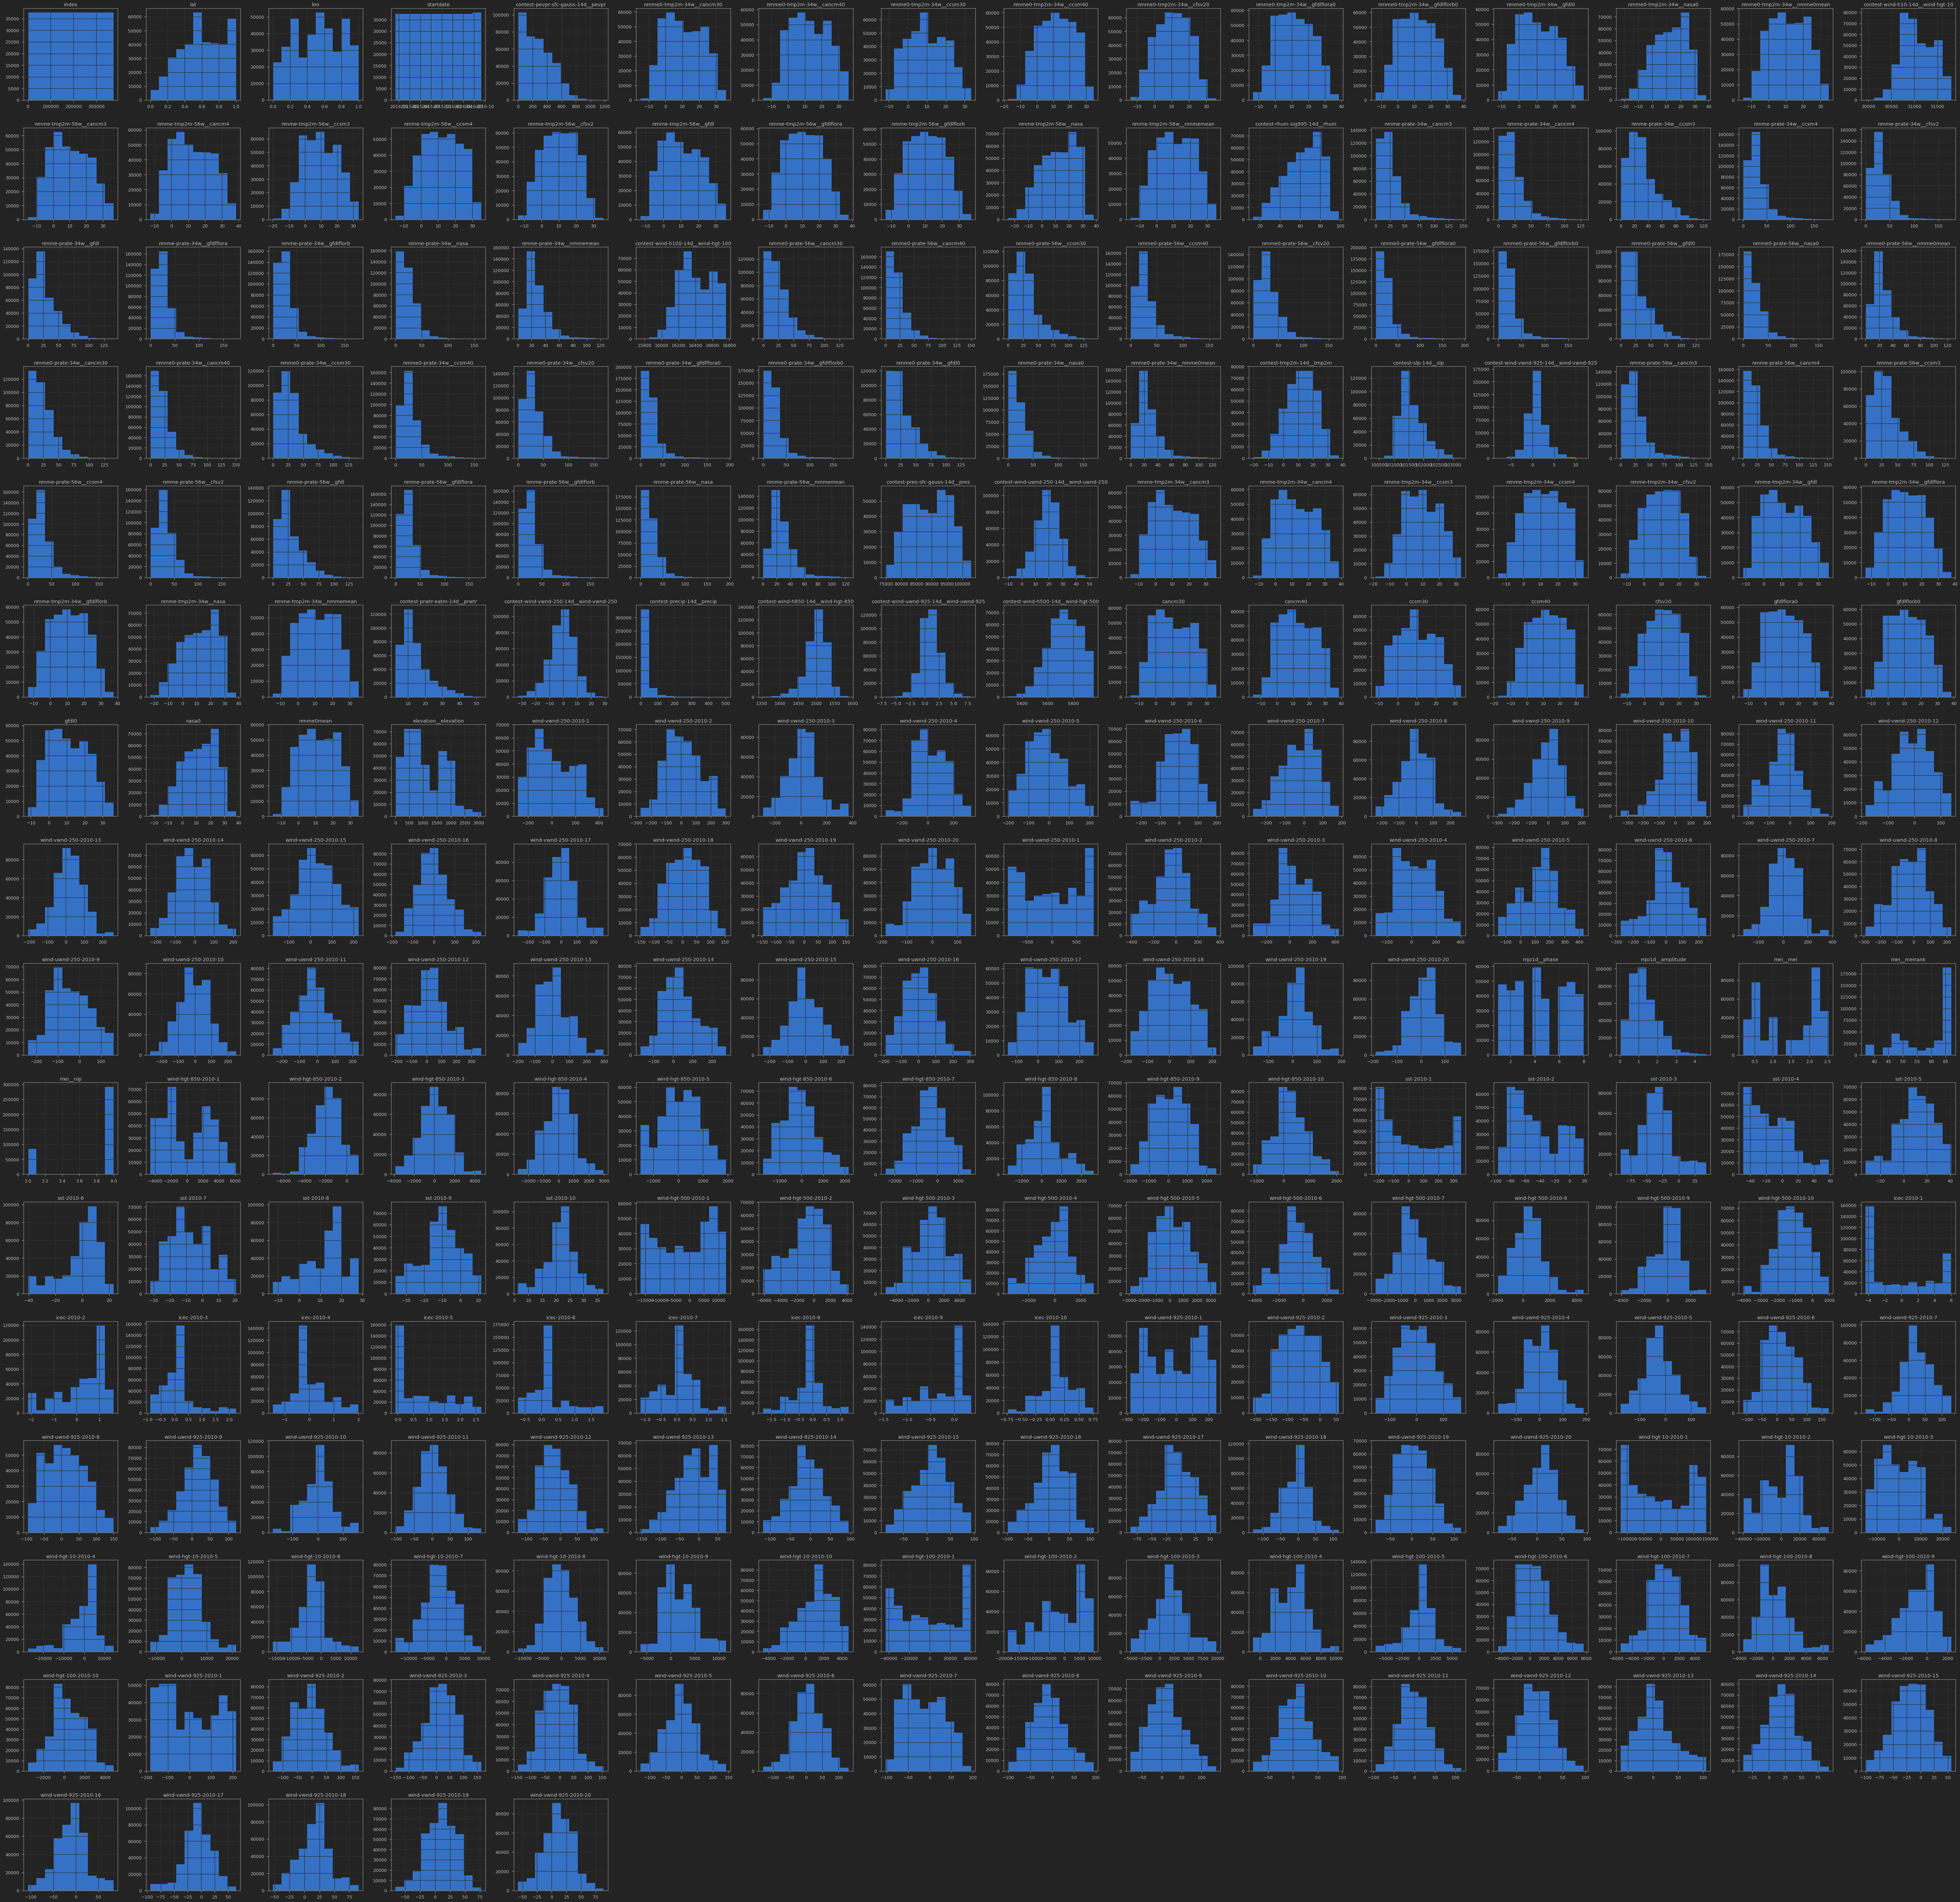

In [ ]:
train_data2.hist(figsize = (100, 100))
plt.show()

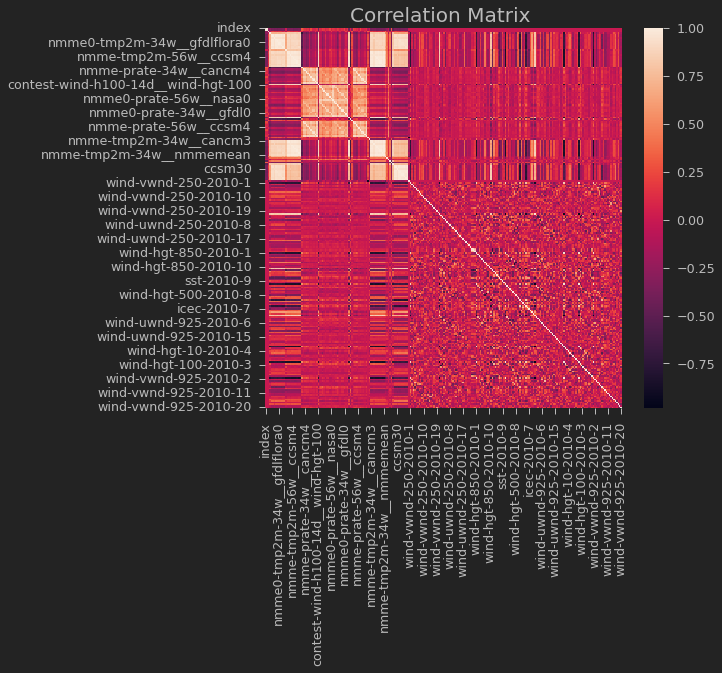

In [ ]:
# Correlation Matrix

#linewidths = 1,
               #annot = True, 
               #fmt = ".2f"

corr_matrix = train_data2.corr()
plt.figure()
cm = sns.heatmap(corr_matrix)
plt.title("Correlation Matrix ", fontsize = 20)
plt.show()

In [ ]:
corr_matrix = train_data.corr()
corr_matrix

index           lat           lon  \
index                               1.000000  9.956331e-01 -2.446660e-01   
lat                                 0.995633  1.000000e+00 -3.063293e-01   
lon                                -0.244666 -3.063293e-01  1.000000e+00   
contest-pevpr-sfc-gauss-14d__pevpr -0.288070 -2.747460e-01 -4.933667e-02   
nmme0-tmp2m-34w__cancm30           -0.376644 -3.832983e-01  1.638870e-01   
...                                      ...           ...           ...   
wind-vwnd-925-2010-16              -0.000422 -3.192526e-15  1.443341e-15   
wind-vwnd-925-2010-17               0.000495  3.573732e-16  3.349322e-17   
wind-vwnd-925-2010-18               0.000427 -4.744638e-15  8.559389e-16   
wind-vwnd-925-2010-19               0.000243  8.948393e-15 -2.199287e-15   
wind-vwnd-925-2010-20               0.000126  2.066830e-15 -4.236727e-16   

                                    contest-pevpr-sfc-gauss-14d__pevpr  \
index                                                        -0.288070   
lat                                                          -0.274746   
lon                                                          -0.049337   
contest-pevpr-sfc-gauss-14d__pevpr                            1.000000   
nmme0-tmp2m-34w__cancm30                                      0.722063   
...                                                                ...   
wind-vwnd-925-2010-16                                         0.168201   
wind-vwnd-925-2010-17                                         0.018848   
wind-vwnd-925-2010-18                                         0.278118   
wind-vwnd-925-2010-19                                        -0.068024   
wind-vwnd-925-2010-20                                        -0.122952   

                                    nmme0-tmp2m-34w__cancm30  \
index                                              -0.376644   
lat                                                -0.383298   
lon                                                 0.163887   
contest-pevpr-sfc-gauss-14d__pevpr                  0.722063   
nmme0-tmp2m-34w__cancm30                            1.000000   
...                                                      ...   
wind-vwnd-925-2010-16                               0.362613   
wind-vwnd-925-2010-17                              -0.037192   
wind-vwnd-925-2010-18                               0.256784   
wind-vwnd-925-2010-19                              -0.184929   
wind-vwnd-925-2010-20                              -0.191375   

                                    nmme0-tmp2m-34w__cancm40  \
index                                              -0.359128   
lat                                                -0.369944   
lon                                                 0.215240   
contest-pevpr-sfc-gauss-14d__pevpr                  0.705139   
nmme0-tmp2m-34w__cancm30                            0.989678   
...                                                      ...   
wind-vwnd-925-2010-16                               0.353810   
wind-vwnd-925-2010-17                              -0.032987   
wind-vwnd-925-2010-18                               0.260874   
wind-vwnd-925-2010-19                              -0.180990   
wind-vwnd-925-2010-20                              -0.196316   

                                    nmme0-tmp2m-34w__ccsm30  \
index                                             -0.395105   
lat                                               -0.401132   
lon                                                0.157882   
contest-pevpr-sfc-gauss-14d__pevpr                 0.717545   
nmme0-tmp2m-34w__cancm30                           0.984421   
...                                                     ...   
wind-vwnd-925-2010-16                              0.317627   
wind-vwnd-925-2010-17                             -0.033291   
wind-vwnd-925-2010-18                              0.158440   
wind-vwnd-925-2010-19                             -0.123957   
wind-v

# Visualization of Missing Data

Note: Why focusing on missing values?
Because it tends to introduce bias that leads to misleading results so that's why we should handle it first.

The Missingno is the Python library compatible with pandas and has excellent visualization of the distribution of NaN values. This library is built on matplotlib thus any graphs it produces will be static.

In [ ]:
#installing missingno

!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

<AxesSubplot:>

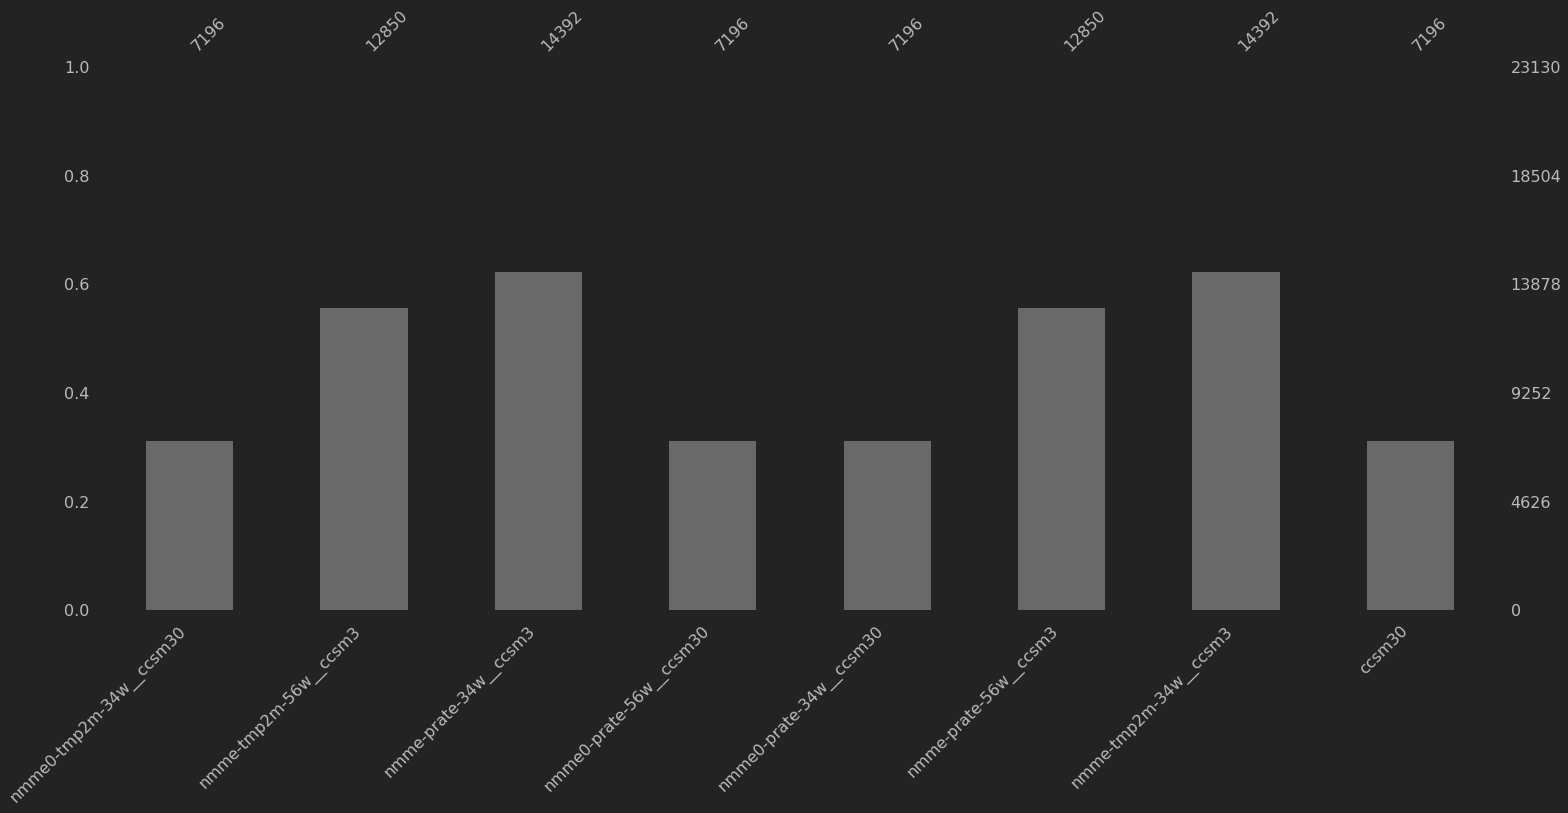

In [ ]:
msno.bar(missing_vals_df)

<AxesSubplot:>

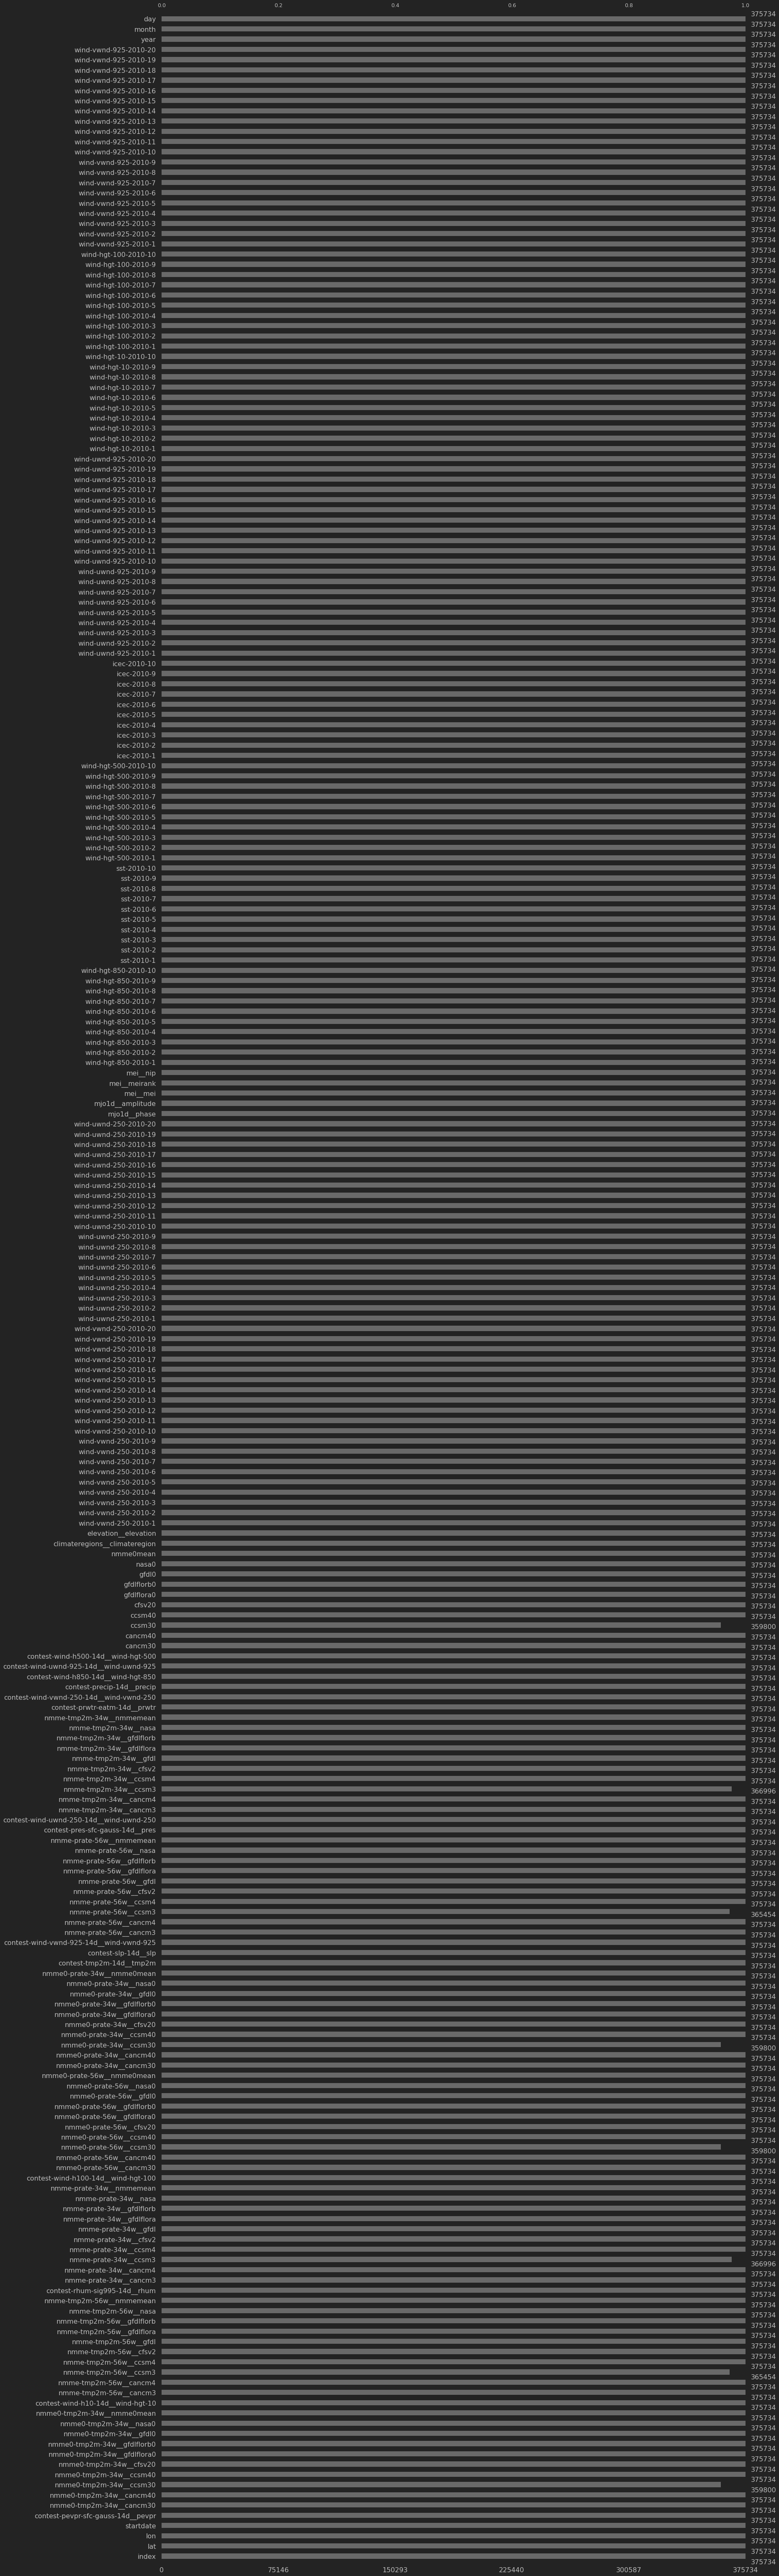

In [ ]:
msno.bar(train_data1)

Here we can see that we need to have 23130 data, but in all the coulmns we have missing values. In first column i.e. 'nmme0-tmp2m-34w_ccsm30' have 7196 values of data and 15,934 entries are missing. Next column nmme-tmp2m-56w_ccsm3 have 12850 entries and 10,280 entries are missing. And so on...

# Correlation Heatmap

Correlation heatmap measures nullity correlation between columns of the dataset i.e., how strongly the presence or absence of one variable affects the presence of another.
The heatmap is helpful for identifying data completeness correlations between variable pairs.

<AxesSubplot:>

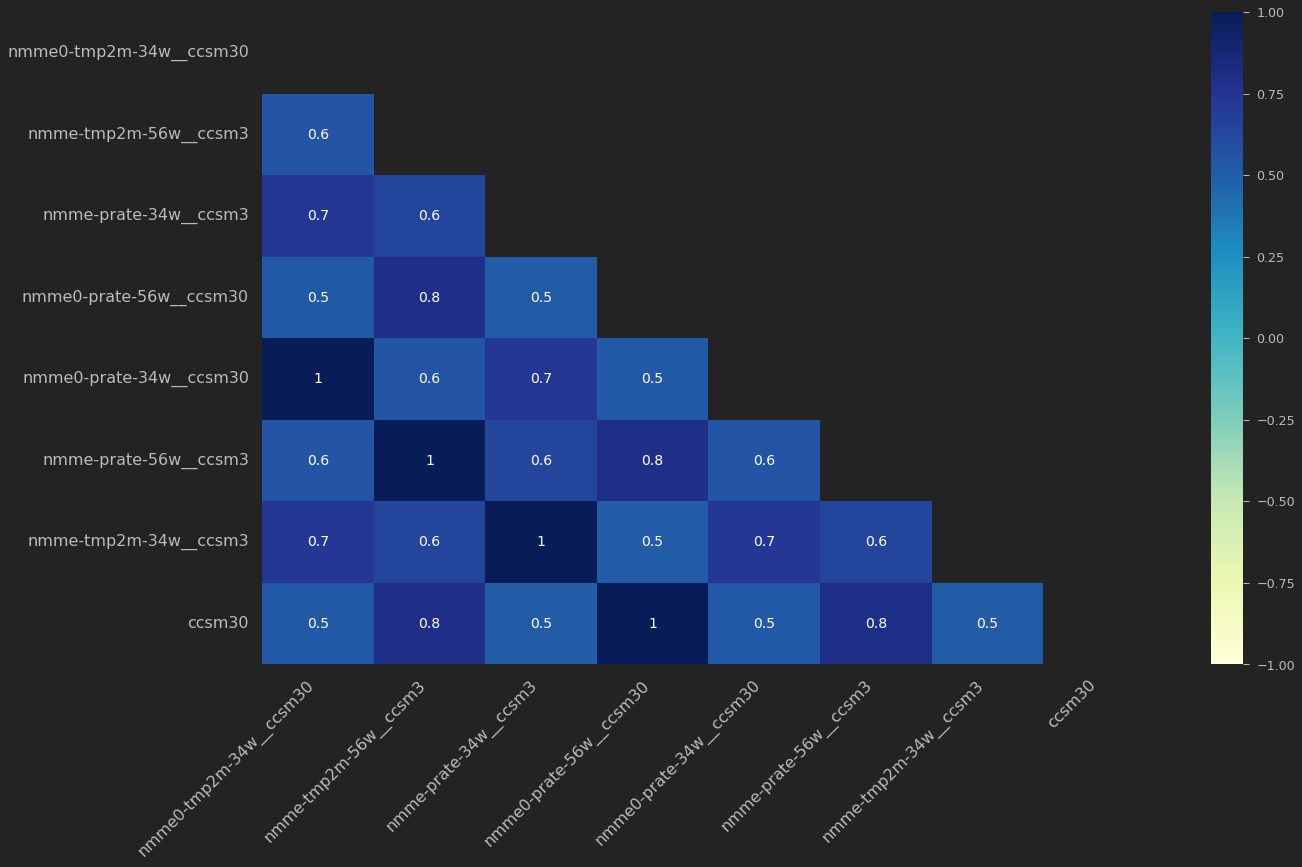

In [ ]:
msno.heatmap(train_data1, cmap='YlGnBu')

**Brief Overview:**
Nullity correlation ranges from(-1 to 1):

* if one variable appears the other definitely does not: -1 (AKA: strong negative correlation, or a yellow color)
* variables appearing or not appearing have no effect on one another: 0
* if one variable appears the other definitely also does: 1 (AKA: strong positive correlation, or a blue color)
* Variables that are always full or always empty have no meaningful correlation, thus the are removed from the visualization.

One thing to notice is that values marked <1 or >-1 have a correlation that is almost exactingly negative or positive, but is still not quite good.

# Matrix

It is the nullity matrix that allows to see the distribution of data across all columns in the dataset.

In [ ]:
msno.matrix(missing_vals_df)

NameError: ignored

The columns nmme-tmp2m-56w_ccsm3, nmme-prate-34w_ccsm3, nmme-prate-56w_ccsm3, nmme-tmp2m-34w_ccsm3 seems to be having less missing values as compared to other missing columns. Because we can see these columns contains less white lines more black lines.

Lower left corner values give the overall row/data of dataset.

# Dendogram

<AxesSubplot:>

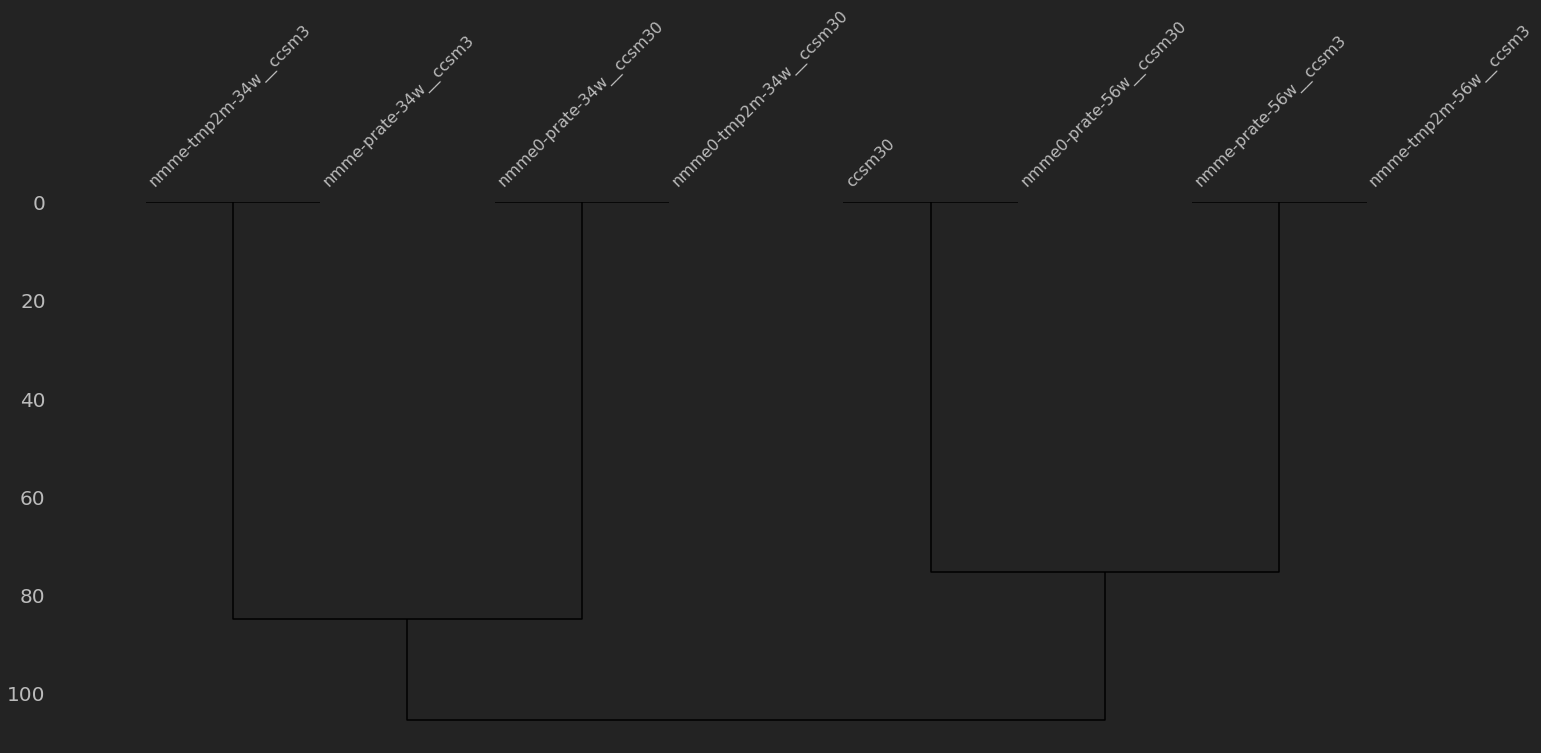

In [ ]:
msno.dendrogram(missing_vals_df)

### **Brief Overview:**
The dendrogram uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation (measured in terms of binary distance).
We interpret the graph based on a top-down approach. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on.
We can see that nmme-temp2m-34w_ccsm3 is grouped with nmme-prate-34w_ccsm3 which are further grouped with nmme0-prate-34w-ccsm30, nmme0-temp2m-34w_ccsm30 and so on.

# Replacing all Null Values

In [ ]:
missing_vals_df.head()

nmme0-tmp2m-34w__ccsm30  nmme-tmp2m-56w__ccsm3  nmme-prate-34w__ccsm3  \
356                      NaN                  28.88                   0.64   
357                      NaN                  28.67                   0.57   
358                      NaN                  28.46                   0.50   
359                      NaN                  28.26                   0.43   
360                      NaN                  28.05                   0.36   

     nmme0-prate-56w__ccsm30  nmme0-prate-34w__ccsm30  nmme-prate-56w__ccsm3  \
356                    19.37                      NaN                   8.31   
357                    19.37                      NaN                   9.53   
358                    19.37                      NaN                  10.74   
359                    19.37                      NaN                  11.96   
360                    19.37                      NaN                  13.18   

     nmme-tmp2m-34w__ccsm3  ccsm30  
356                   0.64   28.88  
357                   0.57   28.88  
358                   0.50   28.88  
359                   0.43   28.88  
360                   0.36   28.88

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(train_data2, 'nmme0-prate-34w__ccsm30')
outliers


index       lat       lon  startdate  \
6966      6966  0.090909  0.933333 2015-09-23   
6967      6967  0.090909  0.933333 2015-09-24   
6968      6968  0.090909  0.933333 2015-09-25   
6969      6969  0.090909  0.933333 2015-09-26   
6970      6970  0.090909  0.933333 2015-09-27   
...        ...       ...       ...        ...   
362380  362380  1.000000  0.266667 2016-02-18   
362381  362381  1.000000  0.266667 2016-02-19   
362382  362382  1.000000  0.266667 2016-02-20   
362383  362383  1.000000  0.266667 2016-02-21   
362384  362384  1.000000  0.266667 2016-02-22   

        contest-pevpr-sfc-gauss-14d__pevpr  nmme0-tmp2m-34w__cancm30  \
6966                                306.33                     29.25   
6967                                298.87                     29.25   
6968                                294.48                     29.25   
6969                                296.27                     29.25   
6970                                299.61                     29.25   
...                                    ...                       ...   
362380                               31.84                     -9.82   
362381                               32.95                     -9.82   
362382                               31.69                     -9.82   
362383                               30.73                     -9.82   
362384                               33.01                     -9.82   

        nmme0-tmp2m-34w__cancm40  nmme0-tmp2m-34w__ccsm30  \
6966                       30.10                    26.94   
6967                       30.10                    26.94   
6968                       30.10                    26.94   
6969                       30.10                    26.94   
6970                       30.10                    26.94   
...                          ...                      ...   
362380                     -7.45                    -4.94   
362381                     -7.45                    -4.94   
362382                     -7.45                    -4.94   
362383                     -7.45                    -4.94   
362384                     -7.45                    -4.94   

        nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  ...  \
6966                      27.79                    25.28  ...   
6967                      27.79                    25.28  ...   
6968                      27.79                    25.28  ...   
6969                      27.79                    25.28  ...   
6970                      27.79                    25.28  ...   
...                         ...                      ...  ...   
362380                    -8.05                    -8.73  ...   
362381                    -8.05                    -8.73  ...   
362382                    -8.05                    -8.73  ...   
362383                    -8.05                    -8.73  ...   
362384                    -8.05                    -8.73  ...   

        wind-vwnd-925-2010-11  wind-vwnd-925-2010-12  wind-vwnd-925-2010-13  \
6966                   -36.69                 -82.15                  91.35   
6967                   -35.66                 -79.84                  89.63   
6968                   -34.13                 -73.20                  89.57   
6969                   -36.49                 -60.66                  92.72   
6970                   -40.73                 -57.91                 101.72   
...                       ...                    ...                    ...   
362380                  21.73                 -36.52                   1.74   
362381                  23.68                 -40.42                  -0.69   
362382                  28.95                 -37.52                  -1.17   
362383                  37.16                 -31.12                   0.87   
362384                  42.08                 -21.32                   4.63   

        wind-vwnd-925-2010-14  wind-vwnd-925-2010-15  wind-vwnd-925-2010-16  \
6966         

In [ ]:
fill_val_mean

index  lat       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0            0  0.0  0.833333 2014-09-01                              237.00   
1            1  0.0  0.833333 2014-09-02                              228.90   
2            2  0.0  0.833333 2014-09-03                              220.69   
3            3  0.0  0.833333 2014-09-04                              225.28   
4            4  0.0  0.833333 2014-09-05                              237.24   
...        ...  ...       ...        ...                                 ...   
375729  375729  1.0  0.866667 2016-08-27                              312.05   
375730  375730  1.0  0.866667 2016-08-28                              305.82   
375731  375731  1.0  0.866667 2016-08-29                              311.62   
375732  375732  1.0  0.866667 2016-08-30                              304.54   
375733  375733  1.0  0.866667 2016-08-31                              295.29   

        nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                          29.02                     31.64   
1                          29.02                     31.64   
2                          29.02                     31.64   
3                          29.02                     31.64   
4                          29.02                     31.64   
...                          ...                       ...   
375729                     23.13                     27.20   
375730                     23.13                     27.20   
375731                     23.13                     27.20   
375732                     23.13                     27.20   
375733                     23.13                     27.20   

        nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  \
0                         29.57                    30.73   
1                         29.57                    30.73   
2                         29.57                    30.73   
3                         29.57                    30.73   
4                         29.57                    30.73   
...                         ...                      ...   
375729                    20.25                    24.43   
375730                    20.25                    24.43   
375731                    20.25                    24.43   
375732                    20.25                    24.43   
375733                    20.25                    24.43   

        nmme0-tmp2m-34w__cfsv20  ...  wind-vwnd-925-2010-11  \
0                         29.71  ...                 -27.68   
1                         29.71  ...                 -21.13   
2                         29.71  ...                 -10.72   
3                         29.71  ...                   0.33   
4                         29.71  ...                   9.83   
...                         ...  ...                    ...   
375729                    18.35  ...                 -15.64   
375730                    18.35  ...                  -7.59   
375731                    18.35  ...                  -6.25   
375732                    18.35  ...                  -7.16   
375733                    18.35  ...                 -12.36   

        wind-vwnd-925-2010-12  wind-vwnd-925-2010-13  wind-vwnd-925-2010-14  \
0                      -37.21                   8.32                   9.56   
1                      -36.57                   8.77                  21.17   
2                      -34.16                   6.99                  32.16   
3                      -31.04                   6.17                  39.66   
4                      -31.80                   7.47                  38.62   
...                       ...                    ...                    ...   
375729                 -75.68                  -3.09                   6.93   
375730                 -76.42                 -13.55                  13.36   
375731                 -70.65                 -23.93                  22.62   
375732                 -57.67      

# Pearson correlation

Calculate the relationship between all features

In [ ]:
# Calculate the Pearson correlation coefficient between all features
corr = fill_val_mean.corr(method='pearson')

# Print the correlation matrix
print(corr)

                                       index           lat           lon  \
index                               1.000000  9.956331e-01 -2.446660e-01   
lat                                 0.995633  1.000000e+00 -3.063293e-01   
lon                                -0.244666 -3.063293e-01  1.000000e+00   
contest-pevpr-sfc-gauss-14d__pevpr -0.288070 -2.747460e-01 -4.933667e-02   
nmme0-tmp2m-34w__cancm30           -0.376644 -3.832983e-01  1.638870e-01   
...                                      ...           ...           ...   
wind-vwnd-925-2010-16              -0.000422 -3.192526e-15  1.443341e-15   
wind-vwnd-925-2010-17               0.000495  3.573732e-16  3.349322e-17   
wind-vwnd-925-2010-18               0.000427 -4.744638e-15  8.559389e-16   
wind-vwnd-925-2010-19               0.000243  8.948393e-15 -2.199287e-15   
wind-vwnd-925-2010-20               0.000126  2.066830e-15 -4.236727e-16   

                                    contest-pevpr-sfc-gauss-14d__pevpr  \
index        

**Brief Overview:**
This is a correlation matrix showing the Pearson correlation coefficient between different features. The features are represented by the row and column labels (e.g. nmme0-tmp2m-34w__ccsm30, nmme-tmp2m-56w__ccsm3, etc.). The values represent the Pearson correlation coefficient between the corresponding row and column features.

For example, the value in the first row and first column is 1.000000e+00, which means that nmme0-tmp2m-34w__ccsm30 has a perfect positive linear relationship with itself (correlation coefficient of 1). The value in the first row and second column is -3.087176e-16, which is a very small negative value close to 0, indicating a very weak negative linear relationship between the two features.

In general, the closer the correlation coefficient is to 1, the stronger the positive linear relationship between the two features. The closer it is to -1, the stronger the negative linear relationship. The closer it is to 0, the weaker the linear relationship between the two features.

# Visual representation of distribution of data in specified columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

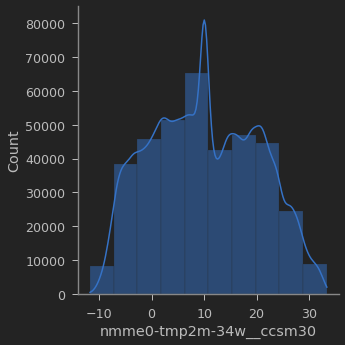

In [ ]:
sns.displot(fill_val_mean, x="nmme0-tmp2m-34w__ccsm30", bins=10, kde=True)

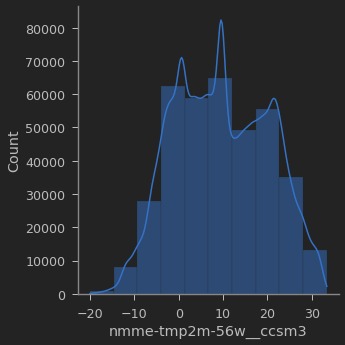

In [ ]:
sns.displot(fill_val_mean, x="nmme-tmp2m-56w__ccsm3", bins=10, kde=True)

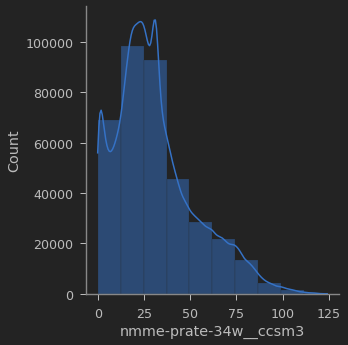

In [ ]:
sns.displot(fill_val_mean, x="nmme-prate-34w__ccsm3", kde=True, bins=10)

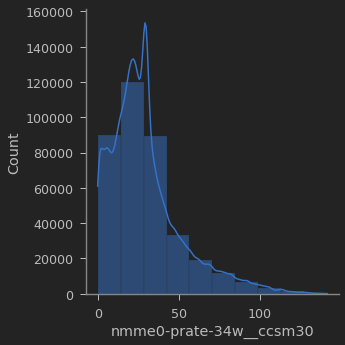

In [ ]:
sns.displot(fill_val_mean, x="nmme0-prate-34w__ccsm30", kde=True, bins=10)

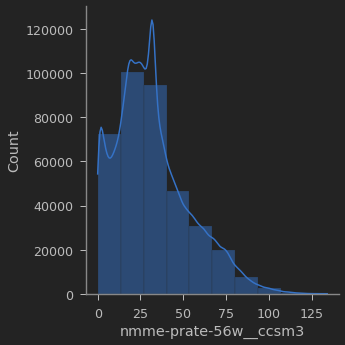

In [ ]:
sns.displot(fill_val_mean, x="nmme-prate-56w__ccsm3", kde=True, bins=10)

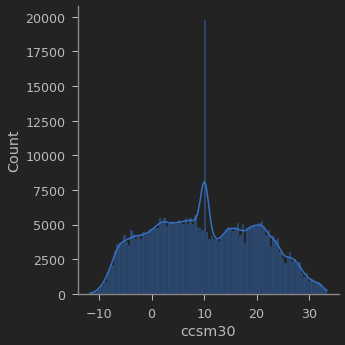

In [ ]:
sns.displot(fill_val_mean, x="ccsm30", kde=True)

By plotting the distribution of the each specific column, we can identify any outliers or unusual values that deviate from the typical distribution of the data.

In [ ]:
import lightgbm as lgb
lgb.plot_importance(model, max_num_features=20, figsize=(8,15))

NameError: ignored

# **Build a Model**

In [ ]:
# Create an empty list to store the selected column names
selected_features = []

# Loop through the column names and select the ones with the prefix "3-4 weeks" or "5-6 weeks"
for name in train_data2.columns:
    if "-34w" in name or "-56w" in name:
        selected_features.append(name)

# Print the selected column names
print(selected_features)

['nmme0-tmp2m-34w__cancm30', 'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30', 'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20', 'nmme0-tmp2m-34w__gfdlflora0', 'nmme0-tmp2m-34w__gfdlflorb0', 'nmme0-tmp2m-34w__gfdl0', 'nmme0-tmp2m-34w__nasa0', 'nmme0-tmp2m-34w__nmme0mean', 'nmme-tmp2m-56w__cancm3', 'nmme-tmp2m-56w__cancm4', 'nmme-tmp2m-56w__ccsm3', 'nmme-tmp2m-56w__ccsm4', 'nmme-tmp2m-56w__cfsv2', 'nmme-tmp2m-56w__gfdl', 'nmme-tmp2m-56w__gfdlflora', 'nmme-tmp2m-56w__gfdlflorb', 'nmme-tmp2m-56w__nasa', 'nmme-tmp2m-56w__nmmemean', 'nmme-prate-34w__cancm3', 'nmme-prate-34w__cancm4', 'nmme-prate-34w__ccsm3', 'nmme-prate-34w__ccsm4', 'nmme-prate-34w__cfsv2', 'nmme-prate-34w__gfdl', 'nmme-prate-34w__gfdlflora', 'nmme-prate-34w__gfdlflorb', 'nmme-prate-34w__nasa', 'nmme-prate-34w__nmmemean', 'nmme0-prate-56w__cancm30', 'nmme0-prate-56w__cancm40', 'nmme0-prate-56w__ccsm30', 'nmme0-prate-56w__ccsm40', 'nmme0-prate-56w__cfsv20', 'nmme0-prate-56w__gfdlflora0', 'nmme0-prate-56w__gfdlflorb0

In [ ]:
print(train_data2.isnull().values.sum())

0


In [ ]:
train_data2.head()

index  lat       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      0  0.0  0.833333 2014-09-01                              237.00   
1      1  0.0  0.833333 2014-09-02                              228.90   
2      2  0.0  0.833333 2014-09-03                              220.69   
3      3  0.0  0.833333 2014-09-04                              225.28   
4      4  0.0  0.833333 2014-09-05                              237.24   

   nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                     29.02                     31.64   
1                     29.02                     31.64   
2                     29.02                     31.64   
3                     29.02                     31.64   
4                     29.02                     31.64   

   nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
0                    29.57                    30.73                    29.71   
1                    29.57                    30.73                    29.71   
2                    29.57                    30.73                    29.71   
3                    29.57                    30.73                    29.71   
4                    29.57                    30.73                    29.71   

   ...  wind-vwnd-925-2010-11  wind-vwnd-925-2010-12  wind-vwnd-925-2010-13  \
0  ...                 -27.68                 -37.21                   8.32   
1  ...                 -21.13                 -36.57                   8.77   
2  ...                 -10.72                 -34.16                   6.99   
3  ...                   0.33                 -31.04                   6.17   
4  ...                   9.83                 -31.80                   7.47   

   wind-vwnd-925-2010-14  wind-vwnd-925-2010-15  wind-vwnd-925-2010-16  \
0                   9.56                  -2.03                  48.13   
1                  21.17                   4.44                  48.60   
2                  32.16                   5.01                  48.53   
3                  39.66                  -1.41                  50.59   
4                  38.62                  -5.21                  54.73   

   wind-vwnd-925-2010-17  wind-vwnd-925-2010-18  wind-vwnd-925-2010-19  \
0                  28.09                 -13.50                  11.90   
1                  27.41                 -23.77                  15.44   
2                  19.21                 -33.16                  15.11   
3                   8.29                 -37.22                  18.24   
4                  -2.58                 -42.30                  21.91   

   wind-vwnd-925-2010-20  
0                   4.58  
1                   3.42  
2                   4.82  
3                   9.74  
4                  10.95  

[5 rows x 246 columns]

In [ ]:
# Use the selected features to train the model
X_train = train_data2[selected_features]
y_train = train_data2["contest-tmp2m-14d__tmp2m"]

NameError: ignored

In [ ]:
# create a RandomForest object
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Get predictions for test set
test_data2['contest-tmp2m-14d__tmp2m'] = rf.predict(test_data2[selected_features])

In [ ]:
# write test predictions using the sample_submission format
test_data2[['index', 'contest-tmp2m-14d__tmp2m']].to_csv('kaggle_submission.csv', index=False)

In [ ]:
import xgboost as xgb

In [ ]:
# create DMatrix on train data
dtrain = xgb.DMatrix(data=train_data2[selected_features], label=train_data2['contest-tmp2m-14d__tmp2m'])

In [ ]:
# define xgboost parameters
params = {'objective':'reg:linear',
          'max_depth':2,
          'verbosity':0}

In [ ]:

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

In [ ]:
xg_depth_2

In [ ]:
# define xgboost parameters
params = {'objective':'reg:linear',
          'max_depth':8,
          'verbosity':0}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

In [ ]:
# define xgboost parameters
params = {'objective':'reg:linear',
          'max_depth':15,
          'verbosity':0}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
dtrain = xgb.DMatrix(data=train_data2[selected_features])
dtest = xgb.DMatrix(data=test_data2[selected_features])

In [ ]:
# for each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:

  # making predictions
  train_pred = model.predict(dtrain)
  test_pred = model.predict(dtest)

  # calculate matrics
  mse_train = mean_squared_error(train_data2['contest-tmp2m-14d__tmp2m'],
                                 train_pred)
  print('MSE Test: {:.3f}'.format(mse_train, mse_test))
  mse_test = mean_squared_error(test_data2['contest-tmp2m-14d__tmp2m'], test_pred)
  print('MSE Train: {:.3f}'.format(mse_train, mse_test))

In [ ]:
# for each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:

  # making predictions
  train_pred = model.predict(dtrain)
  test_pred = model.predict(dtest)

  # calculate matrics
  mse_train = mean_squared_error(train_data2['contest-tmp2m-14d__tmp2m'],
                                 train_pred)
  mse_test = mean_squared_error(test_data2['contest-tmp2m-14d__tmp2m'], test_pred)
  rmse_train = np.sqrt(mse_train)
  rmse_test = np.sqrt(mse_test)
  print('MSE Train: {:.3f}, MSE Test: {:.3f}, RMSE Train: {:.3f}, RMSE Test: {:.3f}'.format(mse_train, mse_test, rmse_train, rmse_test))

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# for each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:

  # making predictions
  train_pred = model.predict(dtrain)
  test_pred = model.predict(dtest)

  # calculate metrics
  mse_train = mean_squared_error(train_data2['contest-tmp2m-14d__tmp2m'],
                                 train_pred)
  mse_test = mean_squared_error(test_data2['contest-tmp2m-14d__tmp2m'], test_pred)
  rmse_train = np.sqrt(mse_train)
  rmse_test = np.sqrt(mse_test)
  r2_train = r2_score(train_data2['contest-tmp2m-14d__tmp2m'], train_pred)
  r2_test = r2_score(test_data2['contest-tmp2m-14d__tmp2m'], test_pred)
  
  print('Model:', model)
  print('MSE Train: {:.3f}, MSE Test: {:.3f}'.format(mse_train, mse_test))
  print('RMSE Train: {:.3f}, RMSE Test: {:.3f}'.format(rmse_train, rmse_test))
  print('R-squared Train: {:.3f}, R-squared Test: {:.3f}'.format(r2_train, r2_test))
  print()


Model: <xgboost.core.Booster object at 0x7f4998f7d8e0>
MSE Train: 8.327, MSE Test: 1.982
RMSE Train: 2.886, RMSE Test: 1.408
R-squared Train: 0.914, R-squared Test: 0.946

Model: <xgboost.core.Booster object at 0x7f4998fb3fa0>
MSE Train: 3.185, MSE Test: 0.722
RMSE Train: 1.785, RMSE Test: 0.849
R-squared Train: 0.967, R-squared Test: 0.980

Model: <xgboost.core.Booster object at 0x7f4998f7d2b0>
MSE Train: 0.995, MSE Test: 0.783
RMSE Train: 0.998, RMSE Test: 0.885
R-squared Train: 0.990, R-squared Test: 0.979



In [ ]:
# Train three XGBoost models on the training data

# Define parameters for model with max depth of 2
params_2 = {'objective': 'reg:linear', 'max_depth': 2}

# Train model with max depth of 2
model_2 = xgb.train(params_2, dtrain)

# Define parameters for model with max depth of 8
params_8 = {'objective': 'reg:linear', 'max_depth': 8}

# Train model with max depth of 8
model_8 = xgb.train(params_8, dtrain)

# Define parameters for model with max depth of 15
params_15 = {'objective': 'reg:linear', 'max_depth': 15}

# Train model with max depth of 15
model_15 = xgb.train(params_15, dtrain)

# Evaluate the performance of each model on the training and test data
for model in [model_2, model_8, model_15]:
    train_pred = model.predict(dtrain)
    test_pred = model.predict(dtest)
    
    mse_train = mean_squared_error(train_data2['contest-tmp2m-14d__tmp2m'], train_pred)
    mse_test = mean_squared_error(test_data2['contest-tmp2m-14d__tmp2m'], test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(train_data2['contest-tmp2m-14d__tmp2m'], train_pred)
    r2_test = r2_score(test_data2['contest-tmp2m-14d__tmp2m'], test_pred)
    
    print(f"Model with max depth of {model.max_depth}:")
    print(f"  RMSE train: {rmse_train:.3f}, RMSE test: {rmse_test:.3f}")
    print(f"  R-squared train: {r2_train:.3f}, R-squared test: {r2_test:.3f}")

# Choose the best performing model based on its test set performance
best_model = model_15 # based on the results of the evaluation above

# Use the best model to make predictions on the test set
test_pred = best_model.predict(dtest)


#**Decision** **Tree**

In [ ]:
X_train = train_data2[selected_features]
y_train = train_data1["contest-tmp2m-14d__tmp2m"]

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
# Create a decision tree regressor model
dTree_reg = DecisionTreeRegressor(random_state=42)

In [ ]:
# Train the model on the training data
dTree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the validation data
y_pred = dTree_reg.predict(X_val)
y_pred

array([17.13161428, 18.65290209, 11.64921289, ..., 10.9385844 ,
       10.64352179,  0.1886806 ])

In [ ]:
# Evaluate the model using various metrics
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [ ]:
# Print the metrics
print("Mean Square Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2:", r2)

Mean Square Error: 1.6572376933388129
Mean Absolute Error: 0.8217849564711243
R^2: 0.9828865808915367


In [ ]:
X_val['contest-tmp2m-14d__tmp2m'] = dTree_reg.predict(X_val[selected_features])

In [ ]:
X_val[['index', 'contest-tmp2m-14d__tmp2m']].to_csv('kaggle_submission.csv', index=False)

# **LGBM Modeling**

In [ ]:
# Concatenate train and test data
all_df = pd.concat([train_data, test_data], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
display(all_df)

print(f'{all_df.loc_group.nunique()} unique locations')
train_data.startdate = pd.to_datetime(train_data.startdate)
test_data.startdate = pd.to_datetime(test_data.startdate)

# Split back up
train_data_22 = all_df.iloc[:len(train_data)]
test_data_22 = all_df.iloc[len(train_data):]

index  lat       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0           0  0.0  0.833333 2014-09-01                              237.00   
1           1  0.0  0.833333 2014-09-02                              228.90   
2           2  0.0  0.833333 2014-09-03                              220.69   
3           3  0.0  0.833333 2014-09-04                              225.28   
4           4  0.0  0.833333 2014-09-05                              237.24   
...       ...  ...       ...        ...                                 ...   
31349  407083  1.0  0.866667 2022-12-27                               62.72   
31350  407084  1.0  0.866667 2022-12-28                               73.41   
31351  407085  1.0  0.866667 2022-12-29                               70.00   
31352  407086  1.0  0.866667 2022-12-30                               79.81   
31353  407087  1.0  0.866667 2022-12-31                               86.17   

       nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                         29.02                     31.64   
1                         29.02                     31.64   
2                         29.02                     31.64   
3                         29.02                     31.64   
4                         29.02                     31.64   
...                         ...                       ...   
31349                      4.60                      8.71   
31350                      4.60                      8.71   
31351                      4.60                      8.71   
31352                      4.60                      8.71   
31353                      4.60                      8.71   

       nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  \
0                        29.57                    30.73   
1                        29.57                    30.73   
2                        29.57                    30.73   
3                        29.57                    30.73   
4                        29.57                    30.73   
...                        ...                      ...   
31349                     6.05                    10.08   
31350                     6.05                    10.08   
31351                     6.05                    10.08   
31352                     6.05                    10.08   
31353                     6.05                    10.08   

       nmme0-tmp2m-34w__cfsv20  ...  wind-vwnd-925-2010-12  \
0                        29.71  ...                 -37.21   
1                        29.71  ...                 -36.57   
2                        29.71  ...                 -34.16   
3                        29.71  ...                 -31.04   
4                        29.71  ...                 -31.80   
...                        ...  ...                    ...   
31349                     6.39  ...                  -8.49   
31350                     6.39  ...                   0.83   
31351                     6.39  ...                  10.90   
31352                     6.39  ...                  21.37   
31353                     6.39  ...                  25.33   

       wind-vwnd-925-2010-13  wind-vwnd-925-2010-14  wind-vwnd-925-2010-15  \
0                       8.32                   9.56                  -2.03   
1                       8.77                  21.17                   4.44   
2                       6.99                  32.16                   5.01   
3                       6.17                  39.66                  -1.41   
4                       7.47                  38.62                  -5.21   
...                      ...                    ...                    ...   
31349                  32.39                  38.82                   7.42   
31350                  26.23                  37.64                  13.01   
31351                  21.06                  36.53                  14.15   
31352                  20.42                  36.05                   6.38   
31353         

575 unique locations


In [ ]:
print('Locations in train that are not in test')
print([c for c in train_data_22.loc_group.unique() if c not in test_data_22.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in test_data_22.loc_group.unique() if c not in train_data_22.loc_group.unique()])

Locations in train that are not in test
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 76, 101, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 181, 210, 239, 269, 300, 330, 360, 389, 418, 447, 475, 504, 533, 559]
Locations in test that are not in train
[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 75, 100, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 180, 209, 238, 268, 299, 329, 359, 388, 417, 446, 474, 503, 532, 558]


Flavia  has resolved this issue in her notebook, different locations train/test SOLVED and found that this issue is caused due to rounding differences between training and test data.

She proposes to truncate the original latitude/longitude coordinates and re-create the location features.

In [ ]:
scale = 14

train_data_22.loc[:,'lat']=round(train_data_22.lat,scale)
train_data_22.loc[:,'lon']=round(train_data_22.lon,scale)

test_data_22.loc[:,'lat']=round(test_data_22.lat,scale)
test_data_22.loc[:,'lon']=round(test_data_22.lon,scale)

# Concatenate train and test data
all_df = pd.concat([train_data_22, test_data_22], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
display(all_df)

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up
train_data_22 = all_df.iloc[:len(train_data)]
test_data_22 = all_df.iloc[len(train_data):]

print('Locations in train that are not in test')
print([c for c in train_data_22.loc_group.unique() if c not in test_data_22.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in test_data_22.loc_group.unique() if c not in train_data_22.loc_group.unique()])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


index  lat       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0           0  0.0  0.833333 2014-09-01                              237.00   
1           1  0.0  0.833333 2014-09-02                              228.90   
2           2  0.0  0.833333 2014-09-03                              220.69   
3           3  0.0  0.833333 2014-09-04                              225.28   
4           4  0.0  0.833333 2014-09-05                              237.24   
...       ...  ...       ...        ...                                 ...   
31349  407083  1.0  0.866667 2022-12-27                               62.72   
31350  407084  1.0  0.866667 2022-12-28                               73.41   
31351  407085  1.0  0.866667 2022-12-29                               70.00   
31352  407086  1.0  0.866667 2022-12-30                               79.81   
31353  407087  1.0  0.866667 2022-12-31                               86.17   

       nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                         29.02                     31.64   
1                         29.02                     31.64   
2                         29.02                     31.64   
3                         29.02                     31.64   
4                         29.02                     31.64   
...                         ...                       ...   
31349                      4.60                      8.71   
31350                      4.60                      8.71   
31351                      4.60                      8.71   
31352                      4.60                      8.71   
31353                      4.60                      8.71   

       nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  \
0                        29.57                    30.73   
1                        29.57                    30.73   
2                        29.57                    30.73   
3                        29.57                    30.73   
4                        29.57                    30.73   
...                        ...                      ...   
31349                     6.05                    10.08   
31350                     6.05                    10.08   
31351                     6.05                    10.08   
31352                     6.05                    10.08   
31353                     6.05                    10.08   

       nmme0-tmp2m-34w__cfsv20  ...  wind-vwnd-925-2010-12  \
0                        29.71  ...                 -37.21   
1                        29.71  ...                 -36.57   
2                        29.71  ...                 -34.16   
3                        29.71  ...                 -31.04   
4                        29.71  ...                 -31.80   
...                        ...  ...                    ...   
31349                     6.39  ...                  -8.49   
31350                     6.39  ...                   0.83   
31351                     6.39  ...                  10.90   
31352                     6.39  ...                  21.37   
31353                     6.39  ...                  25.33   

       wind-vwnd-925-2010-13  wind-vwnd-925-2010-14  wind-vwnd-925-2010-15  \
0                       8.32                   9.56                  -2.03   
1                       8.77                  21.17                   4.44   
2                       6.99                  32.16                   5.01   
3                       6.17                  39.66                  -1.41   
4                       7.47                  38.62                  -5.21   
...                      ...                    ...                    ...   
31349                  32.39                  38.82                   7.42   
31350                  26.23                  37.64                  13.01   
31351                  21.06                  36.53                  14.15   
31352                  20.42                  36.05                   6.38   
31353         

514 unique locations
Locations in train that are not in test
[]
Locations in test that are not in train
[]


contest-tmp2m-14d__tmp2m


<AxesSubplot:xlabel='startdate', ylabel='contest-tmp2m-14d__tmp2m'>

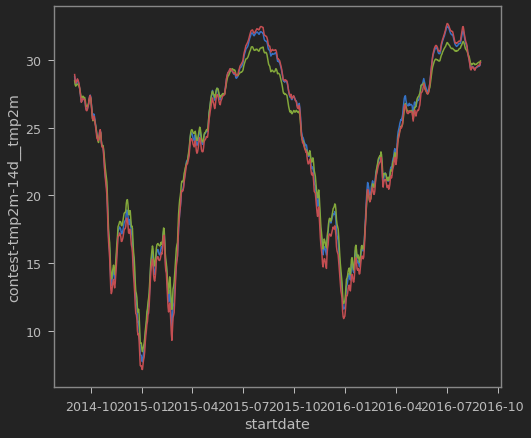

In [ ]:
target = [c for c in train_data.columns if c not in test_data.columns][0]
print(target)
temp = train_data_22[train_data_22.loc_group == 0]
sns.lineplot(data=temp, x = 'startdate', y = target)
temp = train_data_22[train_data_22.loc_group == 1]
sns.lineplot(data=temp, x = 'startdate', y = target)

temp = train_data_22[train_data_22.loc_group == 2]
sns.lineplot(data=temp, x = 'startdate', y = target)

In [ ]:
train_data_22.head()

index  lat       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      0  0.0  0.833333 2014-09-01                              237.00   
1      1  0.0  0.833333 2014-09-02                              228.90   
2      2  0.0  0.833333 2014-09-03                              220.69   
3      3  0.0  0.833333 2014-09-04                              225.28   
4      4  0.0  0.833333 2014-09-05                              237.24   

   nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                     29.02                     31.64   
1                     29.02                     31.64   
2                     29.02                     31.64   
3                     29.02                     31.64   
4                     29.02                     31.64   

   nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
0                    29.57                    30.73                    29.71   
1                    29.57                    30.73                    29.71   
2                    29.57                    30.73                    29.71   
3                    29.57                    30.73                    29.71   
4                    29.57                    30.73                    29.71   

   ...  wind-vwnd-925-2010-12  wind-vwnd-925-2010-13  wind-vwnd-925-2010-14  \
0  ...                 -37.21                   8.32                   9.56   
1  ...                 -36.57                   8.77                  21.17   
2  ...                 -34.16                   6.99                  32.16   
3  ...                 -31.04                   6.17                  39.66   
4  ...                 -31.80                   7.47                  38.62   

   wind-vwnd-925-2010-15  wind-vwnd-925-2010-16  wind-vwnd-925-2010-17  \
0                  -2.03                  48.13                  28.09   
1                   4.44                  48.60                  27.41   
2                   5.01                  48.53                  19.21   
3                  -1.41                  50.59                   8.29   
4                  -5.21                  54.73                  -2.58   

   wind-vwnd-925-2010-18  wind-vwnd-925-2010-19  wind-vwnd-925-2010-20  \
0                 -13.50                  11.90                   4.58   
1                 -23.77                  15.44                   3.42   
2                 -33.16                  15.11                   4.82   
3                 -37.22                  18.24                   9.74   
4                 -42.30                  21.91                  10.95   

   loc_group  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 247 columns]

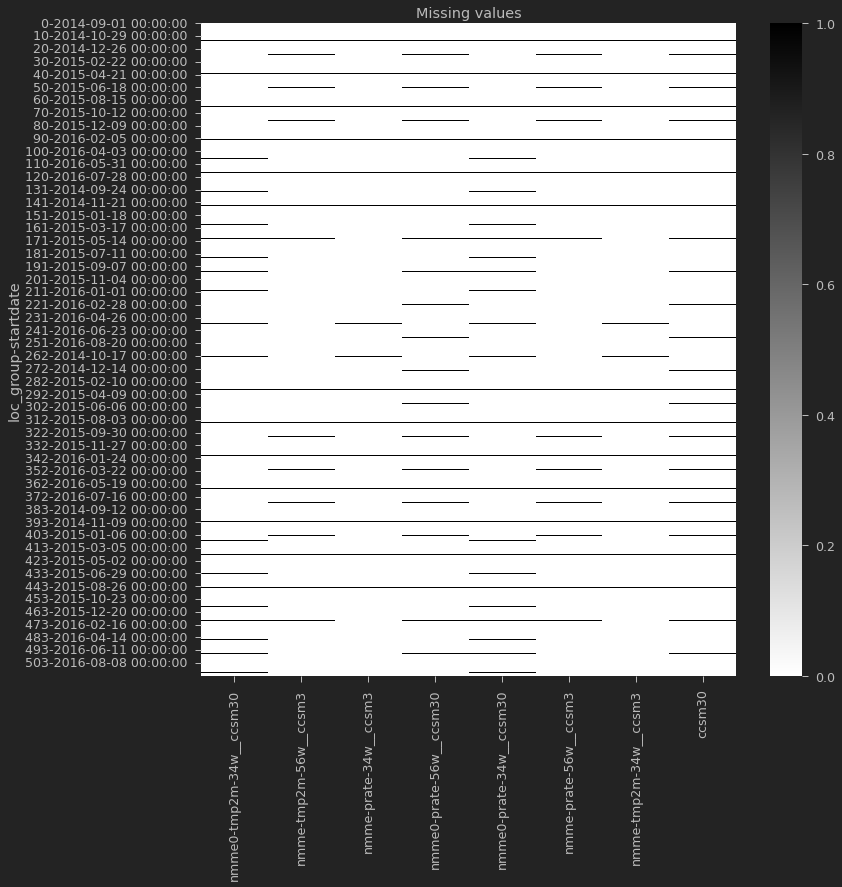

In [ ]:

cols_with_missing = list(train_data_22.isnull().sum(axis=0)[train_data_22.isnull().sum(axis=0) > 0].index)

fig, ax = plt.subplots(1,1,figsize=(12,12))
sns.heatmap(train_data_22.set_index([ 'loc_group', 'startdate'])[cols_with_missing].isnull(), cmap='binary')
ax.set_title('Missing values')
plt.show()

In [ ]:
train_data_22_old = train_data_22.copy()
train_data_22_mean = train_data_22.sort_values(by=['loc_group', 'startdate']).fillna(20)

train_data_22 = train_data_22.sort_values(by=['loc_group', 'startdate']).ffill()

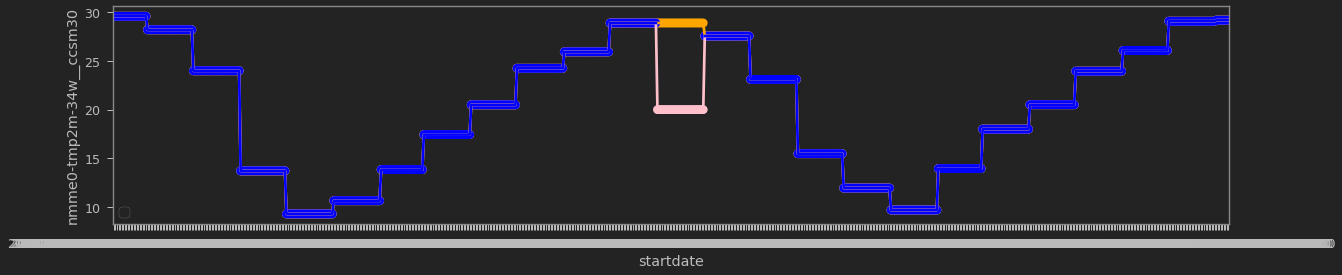

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20,4))
col_with_missing = cols_with_missing[0]
sns.pointplot(data=train_data_22[train_data_22.loc_group ==0], x='startdate', y=col_with_missing, linewidth=1, marker='.', color='orange', label='filled missing data with .ffill()' )
sns.pointplot(data=train_data_22_mean[train_data_22_mean.loc_group ==0], x='startdate', y=col_with_missing, linewidth=1, marker='.', color='pink', label='filled missing data with mean value' )
sns.pointplot(data=train_data_22_old[train_data_22_old.loc_group ==0], x='startdate', y=col_with_missing, linewidth=1, marker='.', color='blue', label='original data' )
plt.legend()
plt.show()

del train_data_22_old, train_data_22_mean

# Feature Engineering

## Label Encoding

In [ ]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
le = preprocessing.LabelEncoder()
train_data_22['climateregions__climateregion'] = le.fit_transform(train_data_22['climateregions__climateregion'])
test_data_22['climateregions__climateregion'] = le.transform(test_data_22['climateregions__climateregion'])

<ipython-input-31-1a4ef37590b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_22['climateregions__climateregion'] = le.transform(test_data_22['climateregions__climateregion'])


# Time Features

In [ ]:

def create_time_features(df):
    df = df.copy()
    #df['year'] = df.startdate.dt.year
    df['quarter'] = df.startdate.dt.quarter
    df['month'] = df.startdate.dt.month
    df['week'] = df.startdate.dt.weekofyear
    df['dayofyear'] = df.startdate.dt.day_of_year
    return df

train_data_22 = create_time_features(train_data_22)
test_data_22 = create_time_features(test_data_22)
train_data_22.head()


<ipython-input-32-3ad928b0f81b>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df.startdate.dt.weekofyear


index  lat       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      0  0.0  0.833333 2014-09-01                              237.00   
1      1  0.0  0.833333 2014-09-02                              228.90   
2      2  0.0  0.833333 2014-09-03                              220.69   
3      3  0.0  0.833333 2014-09-04                              225.28   
4      4  0.0  0.833333 2014-09-05                              237.24   

   nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                     29.02                     31.64   
1                     29.02                     31.64   
2                     29.02                     31.64   
3                     29.02                     31.64   
4                     29.02                     31.64   

   nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
0                    29.57                    30.73                    29.71   
1                    29.57                    30.73                    29.71   
2                    29.57                    30.73                    29.71   
3                    29.57                    30.73                    29.71   
4                    29.57                    30.73                    29.71   

   ...  wind-vwnd-925-2010-16  wind-vwnd-925-2010-17  wind-vwnd-925-2010-18  \
0  ...                  48.13                  28.09                 -13.50   
1  ...                  48.60                  27.41                 -23.77   
2  ...                  48.53                  19.21                 -33.16   
3  ...                  50.59                   8.29                 -37.22   
4  ...                  54.73                  -2.58                 -42.30   

   wind-vwnd-925-2010-19  wind-vwnd-925-2010-20  loc_group  quarter  month  \
0                  11.90                   4.58          0        3      9   
1                  15.44                   3.42          0        3      9   
2                  15.11                   4.82          0        3      9   
3                  18.24                   9.74          0        3      9   
4                  21.91                  10.95          0        3      9   

   week  dayofyear  
0    36        244  
1    36        245  
2    36        246  
3    36        247  
4    36        248  

[5 rows x 251 columns]

In [ ]:
# Copied from https://colab.research.google.com/drive/10r73mOp1R7cORfeuP97V65a-rgwGyfWr?usp=sharing#scrollTo=c9ZkVb2aU-S7

def add_season(df):
    month_to_season = {
      1: 0,
      2: 0,
      3: 1,
      4: 1,
      5: 1,
      6: 2,
      7: 2,
      8: 2, 
      9: 3, 
      10: 3,
      11: 3,
      12: 0
  }
    df['season'] = df['month'].apply(lambda x: month_to_season[x])
add_season(train_data_22)
add_season(test_data_22)

In [ ]:
# Copied from https://colab.research.google.com/drive/10r73mOp1R7cORfeuP97V65a-rgwGyfWr?usp=sharing#scrollTo=c9ZkVb2aU-S7

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))
def encode_cyclical(df):
    # encode the day with a period of 365
    df['day_of_year_sin'] = sin_transformer(365).fit_transform(df['dayofyear'])
    df['day_of_year_cos'] = cos_transformer(365).fit_transform(df['dayofyear'])

    # encode the week with a period of 52
    df['week_sin'] = sin_transformer(52).fit_transform(df['week'])
    df['week_cos'] = cos_transformer(52).fit_transform(df['week'])

    # encode the month with a period of 12
    df['month_sin'] = sin_transformer(12).fit_transform(df['month'])
    df['month_cos'] = cos_transformer(12).fit_transform(df['month']) 
    # encode the season with a period of 4
    df['season_sin'] = sin_transformer(4).fit_transform(df['season'])
    df['season_cos'] = cos_transformer(4).fit_transform(df['season'])
    
    # encode the quarter with a period of 4
    df['quarter_sin'] = sin_transformer(4).fit_transform(df['quarter'])
    df['quarter_cos'] = cos_transformer(4).fit_transform(df['quarter'])

encode_cyclical(train_data_22)
encode_cyclical(test_data_22)

In [ ]:
exclude_cols = ['index', 'startdate']
features = [c for c in train_data_22.columns if ((c != target) & (c not in exclude_cols))]

N_FOLDS = 3

for fold in range(N_FOLDS):
    training_date = train_data_22['startdate'].max() - timedelta(14) * (N_FOLDS-fold)
    valid_date = training_date + timedelta(14)
    print(f"\nFold {fold}: \ntraining data from {train_data_22['startdate'].min()} to {training_date}\nvalidation data from {training_date + timedelta(1)} to {valid_date}")
    train = train_data_22[train_data_22['startdate'] <= training_date]
    val  = train_data_22[(train_data_22['startdate'] > training_date) & (train_data_22['startdate'] <= valid_date) ]
    X_train = train[features]
    y_train = train[target]

    X_val = val[features]
    y_val = val[target]

    train_ds = lgb.Dataset(X_train, label = y_train)
    valid_ds = lgb.Dataset(X_val, label = y_val)
    params = {
        'metric': 'rmse',
        'objective': 'regression',
        'force_col_wise' : True,
    }

    model = lgb.train(params, 
                    train_ds, 
                    num_boost_round = 1000, 
                    valid_sets = [train_ds, valid_ds])

Streaming output truncated to the last 5000 lines.
[17]	training's rmse: 2.40833	valid_1's rmse: 2.60806
[18]	training's rmse: 2.27903	valid_1's rmse: 2.43101
[19]	training's rmse: 2.1642	valid_1's rmse: 2.28934
[20]	training's rmse: 2.06419	valid_1's rmse: 2.16798
[21]	training's rmse: 1.97569	valid_1's rmse: 2.06485
[22]	training's rmse: 1.8947	valid_1's rmse: 1.97892
[23]	training's rmse: 1.82266	valid_1's rmse: 1.89824
[24]	training's rmse: 1.75821	valid_1's rmse: 1.82361
[25]	training's rmse: 1.7005	valid_1's rmse: 1.77336
[26]	training's rmse: 1.65079	valid_1's rmse: 1.73499
[27]	training's rmse: 1.60598	valid_1's rmse: 1.70544
[28]	training's rmse: 1.56606	valid_1's rmse: 1.67344
[29]	training's rmse: 1.53	valid_1's rmse: 1.64399
[30]	training's rmse: 1.49615	valid_1's rmse: 1.63449
[31]	training's rmse: 1.46381	valid_1's rmse: 1.60935
[32]	training's rmse: 1.43535	valid_1's rmse: 1.584
[33]	training's rmse: 1.40816	valid_1's rmse: 1.56254
[34]	training's rmse: 1.38582	valid_1's

In [ ]:
X_train = train_data_22[features]
y_train = train_data_22[target]

train_ds = lgb.Dataset(X_train, label = y_train)

model = lgb.train(params, 
                train_ds, 
                num_boost_round = 1000, 
                #valid_sets = [train_ds, valid_ds], 
                 
                #early_stopping_rounds = 100,
               verbose_eval = 200
               )

In [ ]:
submission[target] = model.predict(test_data_22[features])

NameError: ignored

In [ ]:
submission = pd.read_csv("/content/test_data.csv")
display(submission)
submission[target] = model.predict(test_data_22[features])

index  lat       lon startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      375734  0.0  0.833333   11/1/22                              339.88   
1      375735  0.0  0.833333   11/2/22                              334.63   
2      375736  0.0  0.833333   11/3/22                              337.83   
3      375737  0.0  0.833333   11/4/22                              345.81   
4      375738  0.0  0.833333   11/5/22                              357.39   
...       ...  ...       ...       ...                                 ...   
31349  407083  1.0  0.866667  12/27/22                               62.72   
31350  407084  1.0  0.866667  12/28/22                               73.41   
31351  407085  1.0  0.866667  12/29/22                               70.00   
31352  407086  1.0  0.866667  12/30/22                               79.81   
31353  407087  1.0  0.866667  12/31/22                               86.17   

       nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                         30.88                     30.92   
1                         30.88                     30.92   
2                         30.88                     30.92   
3                         30.88                     30.92   
4                         30.88                     30.92   
...                         ...                       ...   
31349                      4.60                      8.71   
31350                      4.60                      8.71   
31351                      4.60                      8.71   
31352                      4.60                      8.71   
31353                      4.60                      8.71   

       nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  \
0                        29.17                    31.02   
1                        29.17                    31.02   
2                        29.17                    31.02   
3                        29.17                    31.02   
4                        29.17                    31.02   
...                        ...                      ...   
31349                     6.05                    10.08   
31350                     6.05                    10.08   
31351                     6.05                    10.08   
31352                     6.05                    10.08   
31353                     6.05                    10.08   

       nmme0-tmp2m-34w__cfsv20  ...  wind-vwnd-925-2010-11  \
0                        29.47  ...                 -19.28   
1                        29.47  ...                 -19.58   
2                        29.47  ...                 -13.73   
3                        29.47  ...                  -7.97   
4                        29.47  ...                  -0.80   
...                        ...  ...                    ...   
31349                     6.39  ...                  74.96   
31350                     6.39  ...                  88.57   
31351                     6.39  ...                  99.43   
31352                     6.39  ...                 109.39   
31353                     6.39  ...                 116.77   

       wind-vwnd-925-2010-12  wind-vwnd-925-2010-13  wind-vwnd-925-2010-14  \
0                     -39.77                 -29.25                  40.88   
1                     -43.14                 -28.62                  45.37   
2                     -44.22                 -27.67                  49.76   
3                     -49.47                 -19.32                  52.62   
4                     -56.07                  -9.89                  51.23   
...                      ...                    ...                    ...   
31349                  -8.49                  32.39                  38.82   
31350                   0.83                  26.23                  37.64   
31351                  10.90                  21.06                  36.53   
31352                  21.37                  20.42                  36.05   
31353                  25.

In [ ]:
submission[target].to_csv('submission[target].csv', 
                  index = False)

In [ ]:
from google.colab import files


In [ ]:

files.download('submission[target].csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.read_csv("submission[target]")

contest-tmp2m-14d__tmp2m
0                     29.095381
1                     28.990487
2                     29.108452
3                     29.508976
4                     29.780587
...                         ...
31349                  2.194854
31350                  2.122594
31351                  1.559226
31352                  1.484418
31353                  1.465636

[31354 rows x 1 columns]